In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.stats.multitest as multi
import re
import dataframe_image as dfi
from statannotations.Annotator import Annotator
from  matplotlib.ticker import FuncFormatter
sys.path.append('/home/felix/jupyter/jupyter_notebooks/functions')

In [2]:
import ms_analysis as ms

## Add average mol weight of OG to OGs

In [3]:
all_at_raw, all_at_raw_sub, all_at_log2, all_at_log2_sub, all_at_log2_boxplots, all_at_rank_plot, all_at_rank_secr, all_at_fract_plot, all_at_int_plot, all_at_log2_norm, all_at_pca = ms.ISs_data_processing('speru', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/at_ACE_0428_MQ12_Ara_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/ACE_0377_ARA_GCF_000001735.4_TAIR10.1_protein_ids_noX_secretion.tsv')

/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)


In [4]:
nb_raw, nb_raw_sub, nb_log2, nb_log2_sub, nb_log2_boxplots, nb_rank_plot, nb_rank_secr, nb_fract_plot, nb_int_plot, nb_log2_norm, nb_pca = ms.ISs_data_processing('nb', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/nb_ACE_0428_MQ14_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/nbenthamianaE_AA_Supplemental_dataset_06_ids_noX_secretion.tsv')
gm_raw, gm_raw_sub, gm_log2, gm_log2_sub, gm_log2_boxplots, gm_rank_plot, gm_rank_secr, gm_fract_plot, gm_int_plot, gm_log2_norm, gm_pca = ms.ISs_data_processing('gm', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/gm_ACE_0428_MQ13_Gm_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/GCF_000004515.5_Glycine_max_v2.1_protein_ids_noX_secretion.tsv')
at_raw, at_raw_sub, at_log2, at_log2_sub, at_log2_boxplots, at_rank_plot, at_rank_secr, at_fract_plot, at_int_plot, at_log2_norm, at_pca = ms.ISs_data_processing('at', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/at_ACE_0428_MQ12_Ara_proteinGroups_renamed_noW3.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/ACE_0377_ARA_GCF_000001735.4_TAIR10.1_protein_ids_noX_secretion.tsv')
sl_raw, sl_raw_sub, sl_log2, sl_log2_sub, sl_log2_boxplots, sl_rank_plot, sl_rank_secr, sl_fract_plot, sl_int_plot, sl_log2_norm, sl_pca = ms.ISs_data_processing('sl', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/sl_ACE_0428_MQ11_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/solgenomics_Slycopersicum_ITAG4.0_secretion.tsv')
speru_raw, speru_raw_sub, speru_log2, speru_log2_sub, speru_log2_boxplots, speru_rank_plot, speru_rank_secr, speru_fract_plot, speru_int_plot, speru_log2_norm, speru_pca = ms.ISs_data_processing('speru', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/speru_ACE_0557_MQ06_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/Speruvianum_GCA_PROT_slyc_noX_secretion.tsv')
spen_raw, spen_raw_sub, spen_log2, spen_log2_sub, spen_log2_boxplots, spen_rank_plot, spen_rank_secr, spen_fract_plot, spen_int_plot, spen_log2_norm, spen_pca = ms.ISs_data_processing('spen', '/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/proteomics/uncorrected/spenn_ACE_0557_MQ05_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/GCF_001406875.1_SPENNV200_protein_ids_secretion.tsv')

/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)


## Figure 1: General overview of MS datasets

In [5]:
def abundance_distribution(data):
    new = []
    
    for counter, row in enumerate(data.index):
        w_tmp = []
        b_tmp = []
        
        for col in data.columns:
            value = data.loc[row, col]
            
            if ('W' in col) & (value != 0):
                w_tmp.append(value)
                
            elif ('B' in col) & (value != 0):
                b_tmp.append(value)
                
        new.append([row, np.mean(w_tmp), np.mean(b_tmp)])
            
    new = pd.DataFrame(new, columns=['protein_id', 'mock', 'bion'])
    new_m = new.sort_values(by='mock')
    new_m.index = range(len(new_m))
    
    new_b = new.sort_values(by='bion')
    new_b.index = range(len(new_b))
    
    return(new, new_m, new_b)

In [6]:
def abundance_histogram(data, treat1, treat2):
    new = []
    
    for row in data.index:
        new.append([row, data.loc[row, treat1], treat1])
        new.append([row, data.loc[row, treat2], treat2])
        
    new = pd.DataFrame(new, columns=['protein_id', 'value', 'treatment'])
    return(new)

In [7]:
sl_abundances, sl_abundances_m, sl_abundances_b = abundance_distribution(sl_log2)
sp_abundances, sp_abundances_m, sp_abundances_b = abundance_distribution(speru_log2)
sn_abundances, sn_abundances_m, sn_abundances_b = abundance_distribution(spen_log2)
nb_abundances, nb_abundances_m, nb_abundances_b = abundance_distribution(nb_log2)
at_abundances, at_abundances_m, at_abundances_b = abundance_distribution(at_log2)
gm_abundances, gm_abundances_m, gm_abundances_b = abundance_distribution(gm_log2)

sl_abundances_hist = abundance_histogram(sl_abundances, 'mock', 'bion')
sp_abundances_hist = abundance_histogram(sp_abundances, 'mock', 'bion')
sn_abundances_hist = abundance_histogram(sn_abundances, 'mock', 'bion')
nb_abundances_hist = abundance_histogram(nb_abundances, 'mock', 'bion')
at_abundances_hist = abundance_histogram(at_abundances, 'mock', 'bion')
gm_abundances_hist = abundance_histogram(gm_abundances, 'mock', 'bion')

/home/felix/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/felix/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


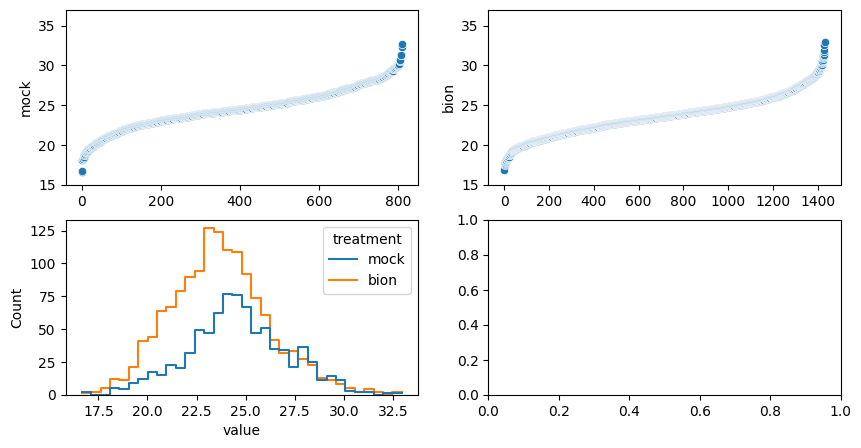

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

scats = [axes[0,0], axes[0,1]]

for i in scats:
    i.set_ylim(15, 37)

sns.scatterplot(data=sp_abundances_m, x=sp_abundances.index, y='mock', ax=axes[0,0])
sns.scatterplot(data=sp_abundances_b, x=sp_abundances.index, y='bion', ax=axes[0,1])

sns.histplot(data=sp_abundances_hist, x='value', hue='treatment', element="step", fill=False, ax=axes[1,0])

plt.show()

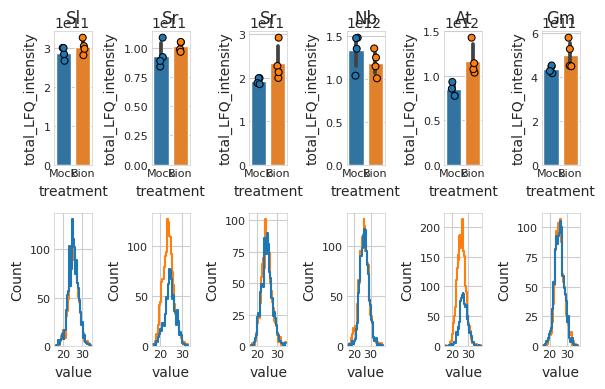

In [9]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6, 4))

grid = (2, 6)
sl_grid_raw = plt.subplot2grid(grid, (0, 0))
sp_grid_raw = plt.subplot2grid(grid, (0, 1))
sn_grid_raw = plt.subplot2grid(grid, (0, 2))
nb_grid_raw = plt.subplot2grid(grid, (0, 3))
at_grid_raw = plt.subplot2grid(grid, (0, 4))
gm_grid_raw = plt.subplot2grid(grid, (0, 5))

sl_grid_lfq = plt.subplot2grid(grid, (1, 0))
sp_grid_lfq = plt.subplot2grid(grid, (1, 1))
sn_grid_lfq = plt.subplot2grid(grid, (1, 2))
nb_grid_lfq = plt.subplot2grid(grid, (1, 3))
at_grid_lfq = plt.subplot2grid(grid, (1, 4))
gm_grid_lfq = plt.subplot2grid(grid, (1, 5))


axes = [sl_grid_raw, sp_grid_raw, sn_grid_raw, nb_grid_raw, at_grid_raw, gm_grid_raw, sl_grid_lfq, sp_grid_lfq, sn_grid_lfq, nb_grid_lfq, at_grid_lfq, gm_grid_lfq]
raws = [sl_grid_raw, sp_grid_raw, sn_grid_raw, nb_grid_raw, at_grid_raw, gm_grid_raw]
lfqs = [sl_grid_lfq, sp_grid_lfq, sn_grid_lfq, nb_grid_lfq, at_grid_lfq, gm_grid_lfq]

annotate_axes(axes)

### Define some arrays ###

names = ['Sl', 'Sr', 'Sr', 'Nb', 'At', 'Gm']

dfs_raw = [sl_int_plot, speru_int_plot, spen_int_plot, nb_int_plot, at_int_plot, gm_int_plot]
dfs_lfq = [sl_abundances_hist, sp_abundances_hist, sn_abundances_hist, nb_abundances_hist, at_abundances_hist, gm_abundances_hist]

#boxplots = [raw_boxN, raw_boxG, raw_boxA]
#boxplots_spec = ['$\it{N.benthamiana}$', '$\it{G.max}$', '$\it{A.thaliana}$']
#boxplots_spec = ['S.lycopersicum', 'S.peruvianum', 'S.pennellii']

#nb_order = ['LFQ_intensity_AF_W_21', 'LFQ_intensity_AF_W_22', 'LFQ_intensity_AF_W_23', 'LFQ_intensity_AF_W_24', 'LFQ_intensity_AF_B_26', 'LFQ_intensity_AF_B_27', 'LFQ_intensity_AF_B_28', 'LFQ_intensity_AF_B_29']
#gm_order = ['LFQ_intensity_AF_W_31', 'LFQ_intensity_AF_W_32', 'LFQ_intensity_AF_W_33', 'LFQ_intensity_AF_W_34', 'LFQ_intensity_AF_B_36', 'LFQ_intensity_AF_B_37', 'LFQ_intensity_AF_B_38', 'LFQ_intensity_AF_B_39']
#at_order = ['LFQ_intensity_AF_W_1', 'LFQ_intensity_AF_W_2', 'LFQ_intensity_AF_W_3', 'LFQ_intensity_AF_W_4', 'LFQ_intensity_AF_B_6', 'LFQ_intensity_AF_B_7', 'LFQ_intensity_AF_B_8', 'LFQ_intensity_AF_B_9']
#box_labels = ['M1', 'M2', 'M3', 'M4', 'B1', 'B2', 'B3', 'B4']

### Generate individual plots ###

# Total intensities

for df, axe, nam in zip(dfs_raw, raws, names):
    sns.barplot(data=df, x='treatment', y='total_LFQ_intensity', ax=axe)
    sns.stripplot(data=df, x='treatment', y='total_LFQ_intensity', edgecolor='black', linewidth=0.75, ax=axe)
    axe.set_title(nam)


# Histogram of intensity distributions

for df, axe, nam in zip(dfs_lfq, lfqs, names):
    sns.histplot(data=df, x='value', hue='treatment', element="step", fill=False, legend=False, ax=axe)

# Slyc, Speru and Spen Total Intensities




#spen.set_xlabel('')
#spen.set_ylabel('Normalised Area', fontsize=6)
#spen.tick_params(axis='y', labelsize=6)
#spen.set_xticklabels(sample_labels, size=5)

#handles, labels = spen.get_legend_handles_labels()
#spen.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/', transparent=True)
plt.show()

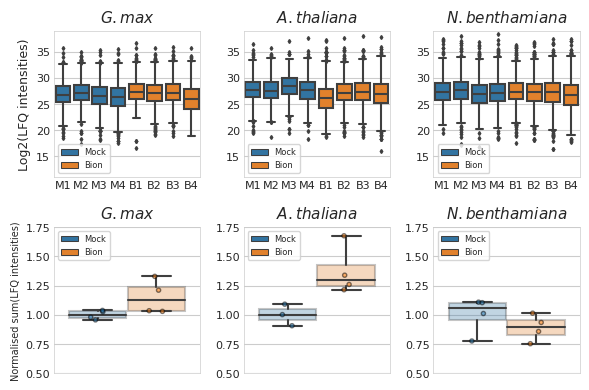

In [10]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6, 4))

'''
raw_boxL = plt.subplot2grid((4, 6), (0, 0), colspan=2)
raw_boxR = plt.subplot2grid((4, 6), (0, 2), colspan=2)
raw_boxS = plt.subplot2grid((4, 6), (0, 4), colspan=2)


raw_LFQL = plt.subplot2grid((4, 6), (1, 0), colspan=2)
raw_LFQR = plt.subplot2grid((4, 6), (1, 2), colspan=2)
raw_LFQS = plt.subplot2grid((4, 6), (1, 4), colspan=2)

rank_slM = plt.subplot2grid((4, 6), (2, 0), rowspan=2)
rank_slB = plt.subplot2grid((4, 6), (2, 1), rowspan=2)

rank_prM = plt.subplot2grid((4, 6), (2, 2), rowspan=2)
rank_prB = plt.subplot2grid((4, 6), (2, 3), rowspan=2)

rank_pnM = plt.subplot2grid((4, 6), (2, 4), rowspan=2)
rank_pnB = plt.subplot2grid((4, 6), (2, 5), rowspan=2)
'''

raw_boxN = plt.subplot2grid((2, 3), (0, 2))
raw_boxG = plt.subplot2grid((2, 3), (0, 0))
raw_boxA = plt.subplot2grid((2, 3), (0, 1))


raw_LFQN = plt.subplot2grid((2, 3), (1, 2))
raw_LFQG = plt.subplot2grid((2, 3), (1, 0))
raw_LFQA = plt.subplot2grid((2, 3), (1, 1))

axes = [raw_boxN, raw_boxG, raw_boxA, raw_LFQN, raw_LFQG, raw_LFQA]
#axes = [raw_boxN, raw_boxG, raw_boxA]
annotate_axes(axes)

### Define some arrays ###
species = ['Nb', 'Gm', 'At']
boxplots = [raw_boxN, raw_boxG, raw_boxA]
boxplots_spec = ['$\it{N.benthamiana}$', '$\it{G.max}$', '$\it{A.thaliana}$']
#boxplots_spec = ['S.lycopersicum', 'S.peruvianum', 'S.pennellii']

nb_order = ['LFQ_intensity_AF_W_21', 'LFQ_intensity_AF_W_22', 'LFQ_intensity_AF_W_23', 'LFQ_intensity_AF_W_24', 'LFQ_intensity_AF_B_26', 'LFQ_intensity_AF_B_27', 'LFQ_intensity_AF_B_28', 'LFQ_intensity_AF_B_29']
gm_order = ['LFQ_intensity_AF_W_31', 'LFQ_intensity_AF_W_32', 'LFQ_intensity_AF_W_33', 'LFQ_intensity_AF_W_34', 'LFQ_intensity_AF_B_36', 'LFQ_intensity_AF_B_37', 'LFQ_intensity_AF_B_38', 'LFQ_intensity_AF_B_39']
at_order = ['LFQ_intensity_AF_W_1', 'LFQ_intensity_AF_W_2', 'LFQ_intensity_AF_W_3', 'LFQ_intensity_AF_W_4', 'LFQ_intensity_AF_B_6', 'LFQ_intensity_AF_B_7', 'LFQ_intensity_AF_B_8', 'LFQ_intensity_AF_B_9']
box_labels = ['M1', 'M2', 'M3', 'M4', 'B1', 'B2', 'B3', 'B4']
raw_LFQ = [raw_LFQN, raw_LFQG, raw_LFQA]

### Generate individual plots ###



# Species histograms

for i in boxplots:
    i.set_ylim(11, 39)

sns.boxplot(data=nb_log2_boxplots[nb_log2_boxplots.log2_LFQ_intensity != 0], x='sample', y='log2_LFQ_intensity', hue='treatment', dodge=False, order=nb_order, flierprops = dict(markersize = 2), ax=raw_boxN)
sns.boxplot(data=gm_log2_boxplots[gm_log2_boxplots.log2_LFQ_intensity != 0], x='sample', y='log2_LFQ_intensity', hue='treatment', dodge=False,  order=gm_order, hue_order=['Mock', 'Bion'], flierprops = dict(markersize = 2), ax=raw_boxG)
sns.boxplot(data=all_at_log2_boxplots[all_at_log2_boxplots.log2_LFQ_intensity != 0], x='sample', y='log2_LFQ_intensity', hue='treatment', dodge=False, order=at_order, hue_order=['Mock', 'Bion'], flierprops = dict(markersize = 2), ax=raw_boxA)

handles, labels = raw_boxN.get_legend_handles_labels()
raw_boxN.legend(handles[:2], ['Mock', 'Bion'], ncol=1, loc=3, prop={"size":6}, markerscale=0.5)
raw_boxG.legend(handles[:2], ['Mock', 'Bion'], ncol=1, loc=3, prop={"size":6}, markerscale=0.5)
raw_boxA.legend(handles[:2], ['Mock', 'Bion'], ncol=1, loc=3, prop={"size":6}, markerscale=0.5)

for i, box_spec, spec in zip(boxplots, boxplots_spec, species):
    i.set_xticklabels(box_labels, size=8)
    i.set_title(box_spec, fontsize=11)
    i.set_xlabel('')
#    i.set_xlabel(box_spec, fontsize=10)
    i.set_ylabel('Log2(LFQ intensities)', fontsize=9)
    
    if spec != 'Gm':
        i.set_ylabel('')
    


# Slyc, Speru and Spen Total Intensities

sns.boxplot(data=nb_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', boxprops={'alpha':0.3}, ax=raw_LFQN)
sns.stripplot(data=nb_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=raw_LFQN)
sns.boxplot(data=gm_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', boxprops={'alpha':0.3}, ax=raw_LFQG)
sns.stripplot(data=gm_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=raw_LFQG)
sns.boxplot(data=at_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', boxprops={'alpha':0.3}, ax=raw_LFQA)
sns.stripplot(data=at_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=raw_LFQA)

for i, spec in zip(raw_LFQ, boxplots_spec):
    i.set_ylim(0.5, 1.75)
    i.set_title(spec, fontsize=11)
    i.set_xlabel('')
#    i.set_xlabel(spec, fontsize=10)
    i.set_xticklabels('')
    if i == raw_LFQG:
        i.set_ylabel('Normalised sum(LFQ intensities)', fontsize=7)
    else:
        i.set_ylabel('')
    
    handles, labels = i.get_legend_handles_labels()
    i.legend(handles[:2], labels[:2], loc=2, prop={"size":6}, markerscale=0.5)


#spen.set_xlabel('')
#spen.set_ylabel('Normalised Area', fontsize=6)
#spen.tick_params(axis='y', labelsize=6)
#spen.set_xticklabels(sample_labels, size=5)

#handles, labels = spen.get_legend_handles_labels()
#spen.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure2_jupyter_updated.svg', transparent=True)
plt.show()

## Figure 2: Plot subsetted, z-score-normalised data to show effects of treatment total and enrichment and depletion

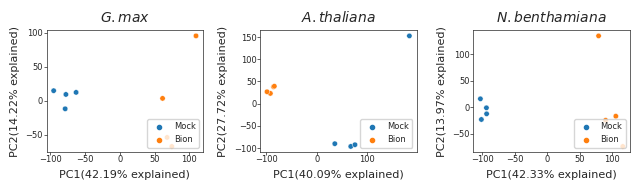

In [11]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=6, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 2))

#pca_sl = plt.subplot2grid((2, 3), (0, 0))
#pca_pr = plt.subplot2grid((2, 3), (0, 1))
#pca_pn = plt.subplot2grid((2, 3), (0, 2))
pca_nb = plt.subplot2grid((1, 3), (0, 2))
pca_gm = plt.subplot2grid((1, 3), (0, 0))
pca_at = plt.subplot2grid((1, 3), (0, 1))


#axes = [pca_sl, pca_pr, pca_pn, pca_nb, pca_gm, pca_at]
axes = [pca_gm, pca_at, pca_nb]
annotate_axes(axes)

### Define some arrays ###
species = ['Gm', 'At', 'Nb']
treat_order = ['W', 'B']
treat_label = ['Mock', 'Bion']


### Generate individual plots ###

'''
# Slyc PCA

sns.scatterplot(data=sl_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_sl)
pca_sl.axes.set_title('$\it{S.lycopersicum}$', fontsize=10)
pca_sl.set_xlabel('PC1({:.2f}% explained)'.format(sl_pca[1][0]*100), fontsize=8)
pca_sl.set_ylabel('PC2({:.2f}% explained)'.format(sl_pca[1][1]*100), fontsize=8)


# Speru PCA

sns.scatterplot(data=speru_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_pr)
pca_pr.axes.set_title('$\it{}S.peruvianum}$', fontsize=10)
pca_pr.set_xlabel('PC1({:.2f}% explained)'.format(speru_pca[1][0]*100), fontsize=8)
pca_pr.set_ylabel('PC2({:.2f}% explained)'.format(speru_pca[1][1]*100), fontsize=8)


# Spen PCA

sns.scatterplot(data=spen_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_pn)
pca_pn.axes.set_title('$\it{S.pennellii}$', fontsize=10)
pca_pn.set_xlabel('PC1({:.2f}% explained)'.format(spen_pca[1][0]*100), fontsize=8)
pca_pn.set_ylabel('PC2({:.2f}% explained)'.format(spen_pca[1][1]*100), fontsize=8)
'''

# Nb PCA

sns.scatterplot(data=nb_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_nb)
pca_nb.axes.set_title('$\it{N.benthamiana}$', fontsize=10)
pca_nb.set_xlabel('PC1({:.2f}% explained)'.format(nb_pca[1][0]*100), fontsize=8)
pca_nb.set_ylabel('PC2({:.2f}% explained)'.format(nb_pca[1][1]*100), fontsize=8)


# Gm PCA

sns.scatterplot(data=gm_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_gm)
pca_gm.axes.set_title('$\it{G.max}$', fontsize=10)
pca_gm.set_xlabel('PC1({:.2f}% explained)'.format(gm_pca[1][0]*100), fontsize=8)
pca_gm.set_ylabel('PC2({:.2f}% explained)'.format(gm_pca[1][1]*100), fontsize=8)


# At PCA

sns.scatterplot(data=all_at_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_at)
pca_at.axes.set_title('$\it{A.thaliana}$', fontsize=10)
pca_at.set_xlabel('PC1({:.2f}% explained)'.format(all_at_pca[1][0]*100), fontsize=8)
pca_at.set_ylabel('PC2({:.2f}% explained)'.format(all_at_pca[1][1]*100), fontsize=8)


for i, spec in zip(axes, species):
    handles, labels = i.get_legend_handles_labels()
    i.legend(handles[:2], treat_label, loc=4, prop={"size":6}, markerscale=0.5)     
            
    
    
'''

# Tomatoes rank plots

for i in ranks:
    i.set_yscale('log')

sns.scatterplot(data=sl_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_slM)
sns.scatterplot(data=sl_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_slB)
   
sns.scatterplot(data=speru_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_prM)
sns.scatterplot(data=speru_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_prB)

sns.scatterplot(data=spen_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_pnM)
sns.scatterplot(data=spen_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_pnB)


# Tomatoes robust detected rank plots

sns.scatterplot(data=sl_rank_secr_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_sec_slM)
sns.scatterplot(data=sl_rank_secr_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_sec_slB)
   
#sns.scatterplot(data=speru_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_prM)
#sns.scatterplot(data=speru_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_prB)

#sns.scatterplot(data=spen_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_pnM)
#sns.scatterplot(data=spen_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_pnB)

for i in ranks:
    i.set_ylabel('')
    i.set_yticklabels('')
'''

#spen.set_xlabel('')
#spen.set_ylabel('Normalised Area', fontsize=6)
#spen.tick_params(axis='y', labelsize=6)
#spen.set_xticklabels(sample_labels, size=5)

#handles, labels = spen.get_legend_handles_labels()
#spen.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure3_jupyter.svg', transparent=True)
plt.show()

## Figure 2.1 Remove A.thaliana replicate - clustermap and PCA

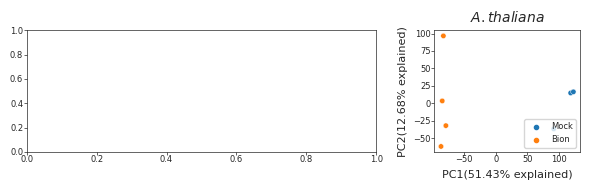

In [12]:
def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=6, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6, 2))

clu = plt.subplot2grid((1, 3), (0, 0), colspan=2)
pca = plt.subplot2grid((1, 3), (0, 2))

#axes = [pca_sl, pca_pr, pca_pn, pca_nb, pca_gm, pca_at]
axes = [clu, pca]
annotate_axes(axes)

### Define some arrays ###
treat_order = ['W', 'B']
treat_label = ['Mock', 'Bion']


### Generate individual plots ###

# At PCA

sns.scatterplot(data=at_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca)
pca.axes.set_title('$\it{A.thaliana}$', fontsize=10)
pca.set_xlabel('PC1({:.2f}% explained)'.format(at_pca[1][0]*100), fontsize=8)
pca.set_ylabel('PC2({:.2f}% explained)'.format(at_pca[1][1]*100), fontsize=8)


handles, labels = pca.get_legend_handles_labels()
pca.legend(handles[:2], treat_label, loc=4, prop={"size":6}, markerscale=0.5)


plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure3_1_jupyter.svg', transparent=True)
plt.show()

<Figure size 1000x500 with 0 Axes>

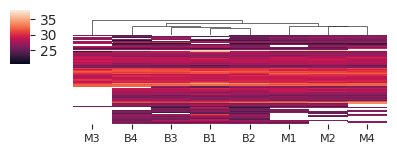

In [13]:
tmp = all_at_log2_sub.copy()
tmp.drop(columns=['predicted_secretion'], inplace=True)
tmp.index = [''] * len(tmp)


fig = plt.figure(figsize=(10, 5))
plt.suptitle('test', fontsize=10)

hea = sns.clustermap(data=tmp, dendrogram_ratio=0.15, mask=(tmp == 0), method='average', metric='euclidean', figsize=(4, 3), vmin=np.min(tmp[tmp!=0].min()), vmax=np.max(tmp[tmp!=0].max()))
hea.ax_row_dendrogram.set_visible(False)

ax = hea.ax_heatmap
ax.set_xticklabels(['M3', 'B4', 'B3', 'B1', 'B2', 'M1', 'M2', 'M4'], rotation=0, fontsize=8)
ax.set_yticklabels('')
ax.yaxis.set_tick_params(which='major', width=0.5, length=0)

#plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure3_2_jupyter.png', dpi=300, transparent=True)
plt.show()

## Orthogroups information

In [14]:
rel_ogs = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/all_MS_relevant_OGs_noImpute.tsv', sep='\t', index_col=0)
rel_ogs = rel_ogs.fillna('empty')

ogsA = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/Orthogroups.tsv', engine='python', sep='\t', index_col=0)
ogsU = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/Orthogroups_UnassignedGenes.tsv', sep='\t', index_col=0)
ogs = ogsA.append(ogsU)
ogs = ogs.fillna('empty')
ogs.rename(columns={'GCF_001406875.1_SPENNV200_protein':'Spen', 'ITAG4.0_proteins_noStar':'Slyc', 'Speruvianum_GCA_PROT_slyc':'Speru', 'ACE_0377_ARA_GCF_000001735.4_TAIR10.1_protein':'At', 'GCF_000004515.5_Glycine_max_v2.1_protein':'Gm', 'nbenthamianaE_AA_Supplemental_dataset_06':'Nb'}, inplace=True)

In [15]:
sl_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/solgenomics_Slycopersicum_ITAG4.0_secretion.tsv', sep='\t', index_col=0)
sr_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/Speruvianum_GCA_PROT_slyc_noX_secretion.tsv', sep='\t', index_col=0)
sn_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/GCF_001406875.1_SPENNV200_protein_ids_secretion.tsv', sep='\t', index_col=0)
nb_sec = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/nbenthamianaE_AA_Supplemental_dataset_06_ids_noX_secretion.tsv', sep='\t', index_col=0)
gm_sec = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/GCF_000004515.5_Glycine_max_v2.1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
at_sec = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/ACE_0377_ARA_GCF_000001735.4_TAIR10.1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)

## Merge into one DF with MW only

df_molw = pd.concat([sl_sec['mol_weight[kDa]'], sr_sec['mol_weight[kDa]'], sn_sec['mol_weight[kDa]'], nb_sec['mol_weight[kDa]'], gm_sec['mol_weight[kDa]'], at_sec['mol_weight[kDa]']], axis=0)

new = []

for c, og in enumerate(rel_ogs.index):
    prots = []
    for col in rel_ogs.columns:
        if rel_ogs.loc[og, col] != 'empty':
            for prot in rel_ogs.loc[og, col].split(','):
                prots.append(prot)
    new.append([og, np.mean(df_molw[df_molw.index.isin(prots)])])

        
ogs_molw = pd.DataFrame(new, columns=['orthogroup', 'mol_weight_kDa'])
ogs_molw.index = ogs_molw['orthogroup']
ogs_molw.drop(columns=['orthogroup'], inplace=True)

## Optimsed log2FC threshold

In [16]:
def optimise_log2FC_threshold(df_raw_sub, change_names_array, species, sign_thresh):
    new_ogs, new_ogs_log2 = og_replicate_intensities(rel_ogs, species, linearise_ms(df_raw_sub[df_raw_sub.predicted_secretion == True]), change_names, 4)
    new_ogs_norm = og_bion_water_mean_score(new_ogs_log2)
    w = ['{}_W{}'.format(species, x) for x in range(1, 5)]
    [w.append('{}_B{}'.format(species, x)) for x in range(1, 5)]
    new_ogs_norm.index = w
    new_ogs_pca_final, new_ogs_pca_explain = og_pca_ms(new_ogs_norm, 3)

    new_ogs_log2.index = w
    new_ogs_log2_comp = new_ogs_log2.T
    new_ogs_log2_comp = two_sided_ogs_t_test(new_ogs_log2_comp).sort_values(by='log2FC', ascending=False)
    new_ogs_log2_comp_change = new_ogs_log2_comp[(new_ogs_log2_comp.log2FC > sign_thresh)]
    new_ogs_log2_comp_change = fdr_correction(new_ogs_log2_comp_change, 'p_value')
    new_ogs_log2_comp_change = new_ogs_log2_comp_change[new_ogs_log2_comp_change.fdr_bh_correction_p_value == True]
    
    
    
    return(species, sign_thresh, len(new_ogs_log2_comp[(new_ogs_log2_comp.log2FC > sign_thresh)]), len(new_ogs_log2_comp_change))

In [17]:
#log2FC_opt.to_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/optimse_log2FC_cutoff.tsv', sep='\t', index=False)
log2FC_opt = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/optimse_log2FC_cutoff.tsv', sep='\t')

In [18]:
new = []

for i in np.unique(log2FC_opt.log2FC_cutoff.to_numpy()):
    tmp = log2FC_opt[log2FC_opt.log2FC_cutoff == i]
    new.append([i, np.sum(tmp.nb_prots_tested), np.sum(tmp.sign_increase)])

log2FC_opt_summary = pd.DataFrame(new, columns=['log2FC_cutoff', 'nb_prots_tested', 'sign_increase'])

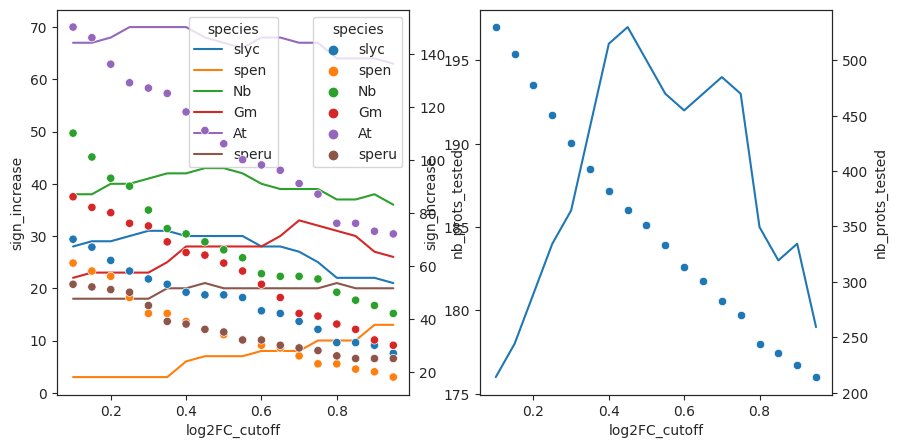

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes2 = axes[0].twinx()
axes3 = axes[1].twinx()

sns.lineplot(data=log2FC_opt, x='log2FC_cutoff', y='sign_increase', hue='species', ax=axes[0])
sns.scatterplot(data=log2FC_opt, x='log2FC_cutoff', y='nb_prots_tested', hue='species', ax=axes2)

sns.lineplot(data=log2FC_opt_summary, x='log2FC_cutoff', y='sign_increase', ax=axes[1])
sns.scatterplot(data=log2FC_opt_summary, x='log2FC_cutoff', y='nb_prots_tested', ax=axes3)

plt.show()

## Add molecular weight info to GOs

In [20]:
sl_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/solgenomics_Slycopersicum_ITAG4.0_secretion.tsv', sep='\t', index_col=0)
sr_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/Speruvianum_GCA_PROT_slyc_noX_secretion.tsv', sep='\t', index_col=0)
sn_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/GCF_001406875.1_SPENNV200_protein_ids_secretion.tsv', sep='\t', index_col=0)
nb_sec = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/nbenthamianaE_AA_Supplemental_dataset_06_ids_noX_secretion.tsv', sep='\t', index_col=0)
at_sec = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/ACE_0377_ARA_GCF_000001735.4_TAIR10.1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
gm_sec = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/secretomes/GCF_000004515.5_Glycine_max_v2.1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)

## Merge into one DF with MW only

df_molw = pd.concat([sl_sec['mol_weight[kDa]'], sr_sec['mol_weight[kDa]'], sn_sec['mol_weight[kDa]'], nb_sec['mol_weight[kDa]'], at_sec['mol_weight[kDa]'], gm_sec['mol_weight[kDa]']], axis=0)
df_molw_mature = pd.concat([sl_sec['mol_weight_mature[kDa]'], sr_sec['mol_weight_mature[kDa]'], sn_sec['mol_weight_mature[kDa]'], nb_sec['mol_weight_mature[kDa]'], at_sec['mol_weight_mature[kDa]'], gm_sec['mol_weight_mature[kDa]']], axis=0)
df_molw_mature.dropna(inplace=True)

new = []

for c, og in enumerate(rel_ogs.index):
    prots = []
    for col in rel_ogs.columns:
        if rel_ogs.loc[og, col] != 'empty':
            for prot in rel_ogs.loc[og, col].split(','):
                prots.append(prot)
                
    new.append([og, np.mean(df_molw[df_molw.index.isin(prots)]), np.mean(df_molw_mature[df_molw_mature.index.isin(prots)])])

        
ogs_molw = pd.DataFrame(new, columns=['orthogroup', 'mol_weight_kDa', 'mol_weight_mature_kDa'])
ogs_molw.index = ogs_molw['orthogroup']
ogs_molw.drop(columns=['orthogroup'], inplace=True)

for og in ogs_molw.index:
    if np.isnan(ogs_molw.loc[og, 'mol_weight_mature_kDa']) == True:
        mw = ogs_molw.loc[og, 'mol_weight_kDa']
        ogs_molw.loc[og, 'mol_weight_mature_kDa'] = mw

In [21]:
change_names = {'LFQ_intensity_AF_W_21':'W1', 'LFQ_intensity_AF_W_22':'W2', 'LFQ_intensity_AF_W_23':'W3', 'LFQ_intensity_AF_W_24':'W4', 'LFQ_intensity_AF_B_26':'B1', 'LFQ_intensity_AF_B_27':'B2', 'LFQ_intensity_AF_B_28':'B3', 'LFQ_intensity_AF_B_29':'B4'}
nb_ogs, nb_ogs_log2, nb_ogs_norm, nb_ogs_pca_final, nb_ogs_pca_explain, nb_ogs_log2_comp, nb_ogs_log2_comp_change = ms.ogs_assign_species(nb_raw_sub, change_names, 'Nb', rel_ogs)

change_names = {'LFQ_intensity_AF_W_31':'W1', 'LFQ_intensity_AF_W_32':'W2', 'LFQ_intensity_AF_W_33':'W3', 'LFQ_intensity_AF_W_34':'W4', 'LFQ_intensity_AF_B_36':'B1', 'LFQ_intensity_AF_B_37':'B2', 'LFQ_intensity_AF_B_38':'B3', 'LFQ_intensity_AF_B_39':'B4'}
gm_ogs, gm_ogs_log2, gm_ogs_norm, gm_ogs_pca_final, gm_ogs_pca_explain, gm_ogs_log2_comp, gm_ogs_log2_comp_change = ms.ogs_assign_species(gm_raw_sub, change_names, 'Gm', rel_ogs)

change_names = {'LFQ_intensity_AF_W_1':'W1', 'LFQ_intensity_AF_W_2':'W2', 'LFQ_intensity_AF_W_3':'W3', 'LFQ_intensity_AF_W_4':'W4', 'LFQ_intensity_AF_B_6':'B1', 'LFQ_intensity_AF_B_7':'B2', 'LFQ_intensity_AF_B_8':'B3', 'LFQ_intensity_AF_B_9':'B4'}
all_at_ogs, all_at_ogs_log2, all_at_ogs_norm, all_at_ogs_pca_final, all_at_ogs_pca_explain, all_at_ogs_log2_comp, all_at_ogs_log2_comp_change = ms.ogs_assign_species(all_at_raw_sub, change_names, 'At', rel_ogs)

change_names = {'LFQ_intensity_AF_W_1':'W1', 'LFQ_intensity_AF_W_2':'W2', 'LFQ_intensity_AF_W_4':'W4', 'LFQ_intensity_AF_B_6':'B1', 'LFQ_intensity_AF_B_7':'B2', 'LFQ_intensity_AF_B_8':'B3', 'LFQ_intensity_AF_B_9':'B4'}
at_ogs, at_ogs_log2, at_ogs_norm, at_ogs_pca_final, at_ogs_pca_explain, at_ogs_log2_comp, at_ogs_log2_comp_change = ms.ogs_assign_species(at_raw_sub, change_names, 'At', rel_ogs)

change_names = {'LFQ_intensity_AF_W_11':'W1', 'LFQ_intensity_AF_W_12':'W2', 'LFQ_intensity_AF_W_13':'W3', 'LFQ_intensity_AF_W_14':'W4', 'LFQ_intensity_AF_B_16':'B1', 'LFQ_intensity_AF_B_17':'B2', 'LFQ_intensity_AF_B_18':'B3', 'LFQ_intensity_AF_B_19':'B4'}
sl_ogs, sl_ogs_log2, sl_ogs_norm, sl_ogs_pca_final, sl_ogs_pca_explain, sl_ogs_log2_comp, sl_ogs_log2_comp_change = ms.ogs_assign_species(sl_raw_sub, change_names, 'slyc', rel_ogs)
spen_ogs, spen_ogs_log2, spen_ogs_norm, spen_ogs_pca_final, spen_ogs_pca_explain, spen_ogs_log2_comp, spen_ogs_log2_comp_change = ms.ogs_assign_species(spen_raw_sub, change_names, 'spen', rel_ogs)

change_names = {'LFQ_intensity_AF_W_01':'W1', 'LFQ_intensity_AF_W_02':'W2', 'LFQ_intensity_AF_W_03':'W3', 'LFQ_intensity_AF_W_04':'W4', 'LFQ_intensity_AF_B_06':'B1', 'LFQ_intensity_AF_B_07':'B2', 'LFQ_intensity_AF_B_08':'B3', 'LFQ_intensity_AF_B_09':'B4'}
speru_ogs, speru_ogs_log2, speru_ogs_norm, speru_ogs_pca_final, speru_ogs_pca_explain, speru_ogs_log2_comp, speru_ogs_log2_comp_change = ms.ogs_assign_species(speru_raw_sub, change_names, 'speru', rel_ogs)

/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeWarning: divide by zero encountered in log2
  new_log2 = np.log2(new)
/home/felix/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:2604: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeWarning: divide by zero encountered in log2
  new_log2 = np.log2(new)
/home/felix/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:2604: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeWarning: divide by zero encountered in log2
  new_log2 = np.log2(new)
/home/felix/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:2604: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeW

In [22]:
def ogs_assign_species(df_raw_sub, change_names_array, species, rel_ogs):
    new_ogs, new_ogs_log2 = ms.og_replicate_intensities(rel_ogs, species, ms.linearise_ms(df_raw_sub[df_raw_sub.predicted_secretion == True]), change_names_array, 4)
    return(new_ogs_log2)
    new_ogs_norm = ms.og_bion_water_mean_score(new_ogs_log2)
    return(new_ogs)
    w = ["{}_{}".format(species, i) for i in new_ogs_norm.index]
    new_ogs_norm.index = w
    new_ogs_pca_final, new_ogs_pca_explain = ms.og_pca_ms(new_ogs_norm, 3)

    new_ogs_log2.index = w
    new_ogs_log2_comp = new_ogs_log2.T
    new_ogs_log2_comp = ms.two_sided_ogs_t_test(new_ogs_log2_comp).sort_values(by='log2FC', ascending=False)
    new_ogs_log2_comp_change = new_ogs_log2_comp[(new_ogs_log2_comp.log2FC > 0.9)]
    new_ogs_log2_comp_change = ms.fdr_correction(new_ogs_log2_comp_change, 'p_value')
    new_ogs_log2_comp_change = new_ogs_log2_comp_change[new_ogs_log2_comp_change.fdr_bh_correction_p_value == True]
    new_ogs_log2_comp_change = new_ogs_log2_comp_change.rename(columns={"log2FC":"{}_log2FC".format(species)})
    new_ogs_log2_comp_change = new_ogs_log2_comp_change.rename(columns={"bion_mean":"{}_bion_mean".format(species)})
    new_ogs_log2_comp_change = new_ogs_log2_comp_change.rename(columns={"untransformed_bion_mean":"{}_untransformed_bion_mean".format(species)})
    new_ogs_log2_comp_change = new_ogs_log2_comp_change.rename(columns={"untransformed_water_mean":"{}_untransformed_water_mean".format(species)})
    
    
    
    return(new_ogs, new_ogs_log2, new_ogs_norm, new_ogs_pca_final, new_ogs_pca_explain, new_ogs_log2_comp, new_ogs_log2_comp_change)

In [23]:
ogs_norm = pd.concat([sl_ogs_norm.T, speru_ogs_norm.T, spen_ogs_norm.T, nb_ogs_norm.T, gm_ogs_norm.T, at_ogs_norm.T], axis=1)

In [24]:
changeome = pd.concat([sl_ogs_log2_comp_change, speru_ogs_log2_comp_change, spen_ogs_log2_comp_change, nb_ogs_log2_comp_change, gm_ogs_log2_comp_change, at_ogs_log2_comp_change], axis=1)

changeome_lfc = pd.concat([sl_ogs_log2_comp_change['slyc_log2FC'], speru_ogs_log2_comp_change['speru_log2FC'], spen_ogs_log2_comp_change['spen_log2FC'], nb_ogs_log2_comp_change['Nb_log2FC'], gm_ogs_log2_comp_change['Gm_log2FC'], at_ogs_log2_comp_change['At_log2FC']], axis=1)
changeome_tot = pd.concat([sl_ogs_log2_comp_change['slyc_bion_mean'], speru_ogs_log2_comp_change['speru_bion_mean'], spen_ogs_log2_comp_change['spen_bion_mean'], nb_ogs_log2_comp_change['Nb_bion_mean'], gm_ogs_log2_comp_change['Gm_bion_mean'], at_ogs_log2_comp_change['At_bion_mean']], axis=1)
changeome_tot = changeome_tot.fillna(0)
changeome_lfc = changeome_lfc.fillna(0)

## Add molecular weight info to lfc and total abundancy data for manual functional annotation

In [25]:
changeome_comb = pd.concat([changeome_lfc, changeome_tot], axis=1)
changeome_comb = pd.concat([changeome_comb, ogs_molw], axis=1, join='inner').sort_values(by='mol_weight_kDa')

In [26]:
fa_changeome = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/conc_corr/orthogroups_annotated.tsv', sep='\t', index_col=0)

In [27]:
changeome_comb = pd.concat([changeome_comb, fa_changeome.reindex(changeome_comb.index)], axis=1)
#changeome_comb.to_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/orthogroups_annotated.tsv', sep='\t')

In [28]:
pr1 = ['OG0010787', 'OG0002595', 'OG0015386', 'OG0016533']
pr2 = ['OG0017238', 'OG0005304', 'OG0011507', 'OG0025995', 'OG0005908', 'OG0003114', 'OG0018661']
pr3 = ['OG0024567', 'OG0023873', 'OG0011319', 'OG0026491', 'OG0036792', 'OG0020158', 'OG0002092', 'OG0002833']
pr7 = ['OG0000168']
pr8 = ['OG0006196']
prs = np.concatenate([pr1, pr2, pr3, pr7, pr8])
len(prs)

21

### Analyse sizes of OGs

In [29]:
for col in rel_ogs.columns:
    tmp = []
    for og in rel_ogs.index:
        prots = rel_ogs.loc[og, col].split(',')
        if prots[0] != 'empty':
            tmp.append(len(prots))
            
    print('{}:\t{}+-{}'.format(col, np.mean(tmp), np.std(tmp)))

slyc:	1.1604938271604939+-0.6565301629781892
spen:	1.4134078212290502+-1.4130434312892783
speru:	1.4444444444444444+-1.1653431646335017
Nb:	1.9464285714285714+-1.2875730611328826
Gm:	1.9282511210762332+-1.3867599718225994
At:	1.7634069400630914+-1.198389456169596


## Figure 5 Changing OGs overview

In [30]:
tmp_rel_ogs = rel_ogs['slyc']
found = tmp_rel_ogs[tmp_rel_ogs != 'empty'].index.to_numpy()
len(sl_ogs_log2_comp[(sl_ogs_log2_comp.index.isin(found)) & (sl_ogs_log2_comp.ratio_wb_untransformed == 0)])

20

In [31]:
def comp_ogs_overview(df, species_small, species_caps):
    tmp_rel_ogs = rel_ogs[species_small]
    tmp_not_found = tmp_rel_ogs[tmp_rel_ogs == 'empty']
    tmp_found = tmp_rel_ogs[tmp_rel_ogs != 'empty'].index.to_numpy()
    
    tmp_ogs = ogs[species_caps]    
    tmp_not_proteome = ogs[(ogs.index.isin(tmp_not_found.index)) & (tmp_ogs == 'empty')]

    tot_not_proteome = len(ogs[(ogs.index.isin(tmp_not_found.index)) & (tmp_ogs == 'empty')])
    tot_not_MS = len(tmp_not_found) - tot_not_proteome
    
    tot_up = ms.fdr_correction(df[df.log2FC > 0.9], 'p_value')
    tot_up = len(tot_up[tot_up.fdr_bh_correction_p_value == True])
    
    tot_gone = len(df[(df.index.isin(tmp_found)) & (df.ratio_wb_untransformed == 0)])
    
    tot_no_change = len(df) - (tot_not_MS + tot_not_proteome + tot_up + tot_gone)
    
    return([species_caps, tot_gone, tot_no_change, tot_up, tot_not_MS, tot_not_proteome])

In [32]:
new = []
new.append(comp_ogs_overview(sl_ogs_log2_comp, 'slyc', 'Slyc'))
new.append(comp_ogs_overview(speru_ogs_log2_comp, 'speru', 'Speru'))
new.append(comp_ogs_overview(spen_ogs_log2_comp, 'spen', 'Spen'))
new.append(comp_ogs_overview(nb_ogs_log2_comp, 'Nb', 'Nb'))
new.append(comp_ogs_overview(gm_ogs_log2_comp, 'Gm', 'Gm'))
new.append(comp_ogs_overview(at_ogs_log2_comp, 'At', 'At'))

toms_ogs_bar = pd.DataFrame(new, columns=['species', 'total_disappear', 'total_not_up', 'total_up', 'total_not_MS', 'total_not_proteome'])
toms_ogs_bar = toms_ogs_bar.set_index(toms_ogs_bar['species'])
toms_ogs_bar.drop(columns=['species'], inplace=True)

In [33]:
species = ['Gm', 'At', 'Nb', 'Slyc', 'Speru', 'Spen']

new = []

for spec in species:
    for cat in toms_ogs_bar.columns:
        val = toms_ogs_bar.loc[spec, cat]
        
        new.append([spec, val, cat])
        
new = pd.DataFrame(new, columns=['species', 'counts', 'names'])
new

,species,counts,names
0,Gm,34,total_disappear
1,Gm,162,total_not_up
2,Gm,27,total_up
3,Gm,296,total_not_MS
4,Gm,226,total_not_proteome
5,At,21,total_disappear
6,At,233,total_not_up
7,At,63,total_up
8,At,214,total_not_MS
9,At,214,total_not_proteome


<ipython-input-34-172645b5b6f1>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(labels, fontsize=11)


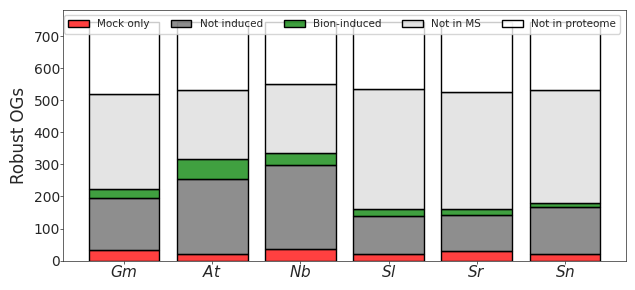

In [34]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=10, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 3))

bar = plt.subplot2grid((1, 1), (0, 0))

axes = [bar]
annotate_axes(axes)

### Define some arrays ###

species = ['Gm', 'At', 'Nb', 'Slyc', 'Speru', 'Spen']
#labels = ['$\itG.max$', '$\itA.thaliana$', '$\itS.lycopersicum$', '$\itS.peruvianum$', '$\itS.pennellii$', '$\itN.benthamiana$']
labels = ['$\itGm$', '$\itAt$', '$\itNb$', '$\itSl$', '$\itSr$', '$\itSn$']
legend_labels = ['Mock only', 'Not induced', 'Bion-induced', 'Not in MS', 'Not in proteome']
order_labels=['total_not_proteome', 'total_not_MS', 'total_up', 'total_not_up', 'total_disappear']


### Generate individual plots ###

sns.histplot(data=new, x='species', weights='counts', hue='names', multiple='stack', hue_order=order_labels, palette=['white', 'gainsboro', 'green', 'dimgray', 'red'], shrink=0.8, edgecolor='black', linewidth=1, ax=bar)

#handles, labels = bar.get_legend_handles_labels()
#bar.legend(handles, labels, ncol=6, loc=2, prop={"size":7}, markerscale=1)
bar.set_xlabel('')
bar.set_ylabel('Robust OGs', fontsize=12)

bar.set_xticklabels(labels, fontsize=11)

bar.legend(legend_labels, ncol=5, loc=1, prop={"size":7.5}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure5_jupyter.svg', transparent=False)
plt.show()

In [35]:
compare_pca = sl_ogs_norm.append([speru_ogs_norm, spen_ogs_norm, nb_ogs_norm, gm_ogs_norm, at_ogs_norm])
compare_pca_final, compare_pca_explain = ms.og_pca_ms(compare_pca, 4)

## Figure 6: Combine proteomes in Orthogroups to compare different species

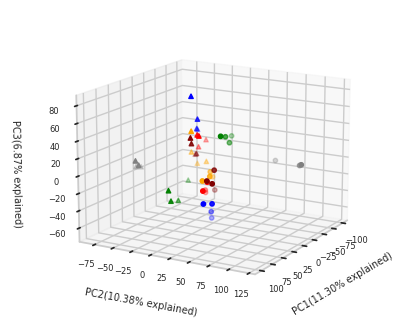

In [36]:
df = compare_pca_final.copy()

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection = '3d')


species = ['slyc', 'slyc', 'spen', 'spen', 'speru', 'speru', 'Nb', 'Nb', 'Gm', 'Gm', 'At', 'At']
treatment = ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B', 'W', 'B', 'W', 'B']
colour = ['red', 'red', 'orange', 'orange', 'maroon', 'maroon', 'green', 'green', 'blue', 'blue', 'grey', 'grey']
shape = ['o', '^', 'o', '^', 'o', '^', 'o', '^', 'o', '^', 'o', '^']

ax.set_xlabel('PC1({:.2f}% explained)'.format(compare_pca_explain[0]*100), fontsize=7)
ax.set_ylabel('PC2({:.2f}% explained)'.format(compare_pca_explain[1]*100), fontsize=7)
ax.set_zlabel('PC3({:.2f}% explained)'.format(compare_pca_explain[2]*100), fontsize=7)

ax.tick_params(axis='both', labelsize=6, pad=1)



for spec, trea, col, sha in zip(species, treatment, colour, shape):
    ax.scatter(df[df['target'].str.contains("{}_{}".format(spec, trea))].PC1, df[df['target'].str.contains("{}_{}".format(spec, trea))].PC2, df[df['target'].str.contains("{}_{}".format(spec, trea))].PC3, s=10, c=col, marker=sha)

ax.view_init(15, 30)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure7_3D_PCA_jupyter.svg', transparent=True)
plt.show()

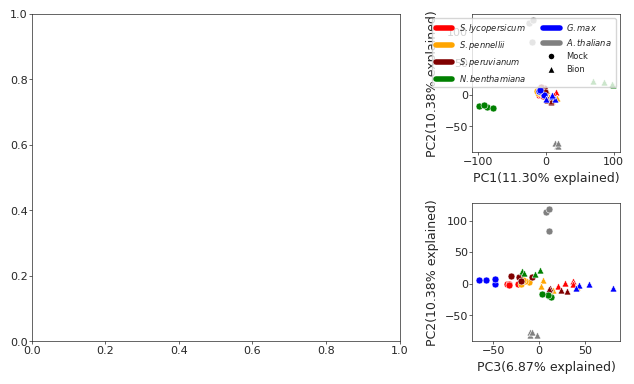

In [37]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 4))

pca3d = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2)
pca12 = plt.subplot2grid((2, 3), (0, 2))
pca23 = plt.subplot2grid((2, 3), (1, 2))
axes = [pca3d, pca12, pca23]
annotate_axes(axes)

### Define some arrays ###

heat_labels = [x.replace("_", "") for x in compare_pca.T.corr().index.to_numpy()]
#heat_labels = [x.replace("Slyc_", "") for x in compare_pca.T.corr().index.to_numpy()]
#heat_labels = [x.replace("Speru_", "") for x in heat_labels]
#heat_labels = [x.replace("Spen_", "") for x in heat_labels]
#heat_labels = [x.replace("Nb_", "") for x in heat_labels]



### Generate individual plots ###

# Tomatoes PCA

species = ['slyc', 'slyc', 'spen', 'spen', 'speru', 'speru', 'Nb', 'Nb', 'Gm', 'Gm', 'At', 'At']
treatment = ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B', 'W', 'B', 'W', 'B']
colour = ['red', 'red', 'orange', 'orange', 'maroon', 'maroon', 'green', 'green', 'blue', 'blue', 'grey', 'grey']
shape = ['o', '^', 'o', '^', 'o', '^', 'o', '^', 'o', '^', 'o', '^']

for spec, treat, col, sha in zip(species, treatment, colour, shape):
    sns.scatterplot(x=compare_pca_final[compare_pca_final['target'].str.contains('{}_{}'.format(spec, treat))]['PC1'], y=compare_pca_final[compare_pca_final['target'].str.contains('{}_{}'.format(spec, treat))]['PC2'], c=[col], marker=sha, s=25, ax=pca12)

pca12.set_xlabel('PC1({:.2f}% explained)'.format(compare_pca_explain[0]*100), fontsize=9)
pca12.set_ylabel('PC2({:.2f}% explained)'.format(compare_pca_explain[1]*100), fontsize=9)
    
for spec, treat, col, sha in zip(species, treatment, colour, shape):
    sns.scatterplot(x=compare_pca_final[compare_pca_final['target'].str.contains('{}_{}'.format(spec, treat))]['PC3'], y=compare_pca_final[compare_pca_final['target'].str.contains('{}_{}'.format(spec, treat))]['PC2'], c=[col], marker=sha, s=25, ax=pca23)

pca23.set_xlabel('PC3({:.2f}% explained)'.format(compare_pca_explain[2]*100), fontsize=9)
pca23.set_ylabel('PC2({:.2f}% explained)'.format(compare_pca_explain[1]*100), fontsize=9)

legend_elements = [Line2D([0], [0], color='red', lw=4, label='$\itS.lycopersicum$'),
                   Line2D([0], [0], color='orange', lw=4, label='$\itS.pennellii$'),
                   Line2D([0], [0], color='maroon', lw=4, label='$\itS.peruvianum$'),
                   Line2D([0], [0], color='green', lw=4, label='$\itN.benthamiana$'),
                   Line2D([0], [0], color='blue', lw=4, label='$\itG.max$'),
                   Line2D([0], [0], color='grey', lw=4, label='$\itA.thaliana$'),
                   Line2D([0], [0], marker='o', color='w', label='Mock', markerfacecolor='black', markersize=5),
                   Line2D([0], [0], marker='^', color='w', label='Bion',
                          markerfacecolor='black', markersize=6)]


pca12.legend(handles=legend_elements, ncol=2, loc='best', prop={"size":6})


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure7_2D_PCA_jupyter.svg', transparent=True)
plt.show()

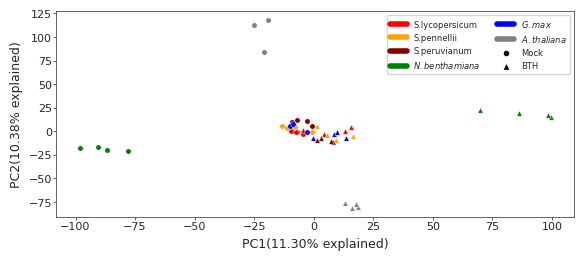

In [38]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 5))

pca = plt.subplot2grid((2, 1), (0, 0))

axes = [pca]
annotate_axes(axes)

### Define some arrays ###

heat_labels = [x.replace("_", "") for x in compare_pca.T.corr().index.to_numpy()]
#heat_labels = [x.replace("Slyc_", "") for x in compare_pca.T.corr().index.to_numpy()]
#heat_labels = [x.replace("Speru_", "") for x in heat_labels]
#heat_labels = [x.replace("Spen_", "") for x in heat_labels]
#heat_labels = [x.replace("Nb_", "") for x in heat_labels]



### Generate individual plots ###

# Tomatoes PCA

species = ['slyc', 'slyc', 'spen', 'spen', 'speru', 'speru', 'Nb', 'Nb', 'Gm', 'Gm', 'At', 'At']
treatment = ['W', 'B', 'W', 'B', 'W', 'B', 'W', 'B', 'W', 'B', 'W','B']
colour = ['red', 'red', 'orange', 'orange', 'maroon', 'maroon', 'green', 'green', 'blue', 'blue', 'grey', 'grey']
shape = ['o', '^', 'o', '^', 'o', '^', 'o', '^', 'o', '^', 'o', '^']

for spec, treat, col, sha in zip(species, treatment, colour, shape):
    sns.scatterplot(x=compare_pca_final[compare_pca_final['target'].str.contains('{}_{}'.format(spec, treat))]['PC1'], y=compare_pca_final[compare_pca_final['target'].str.contains('{}_{}'.format(spec, treat))]['PC2'], c=[col], marker=sha, s=15, ax=pca)


#pca.axes.set_title('PCA of AF samples of Solanaceae species', fontsize=4)
pca.set_xlabel('PC1({:.2f}% explained)'.format(compare_pca_explain[0]*100), fontsize=9)
pca.set_ylabel('PC2({:.2f}% explained)'.format(compare_pca_explain[1]*100), fontsize=9)

legend_elements = [Line2D([0], [0], color='red', lw=4, label='S.lycopersicum'),
                   Line2D([0], [0], color='orange', lw=4, label='S.pennellii'),
                   Line2D([0], [0], color='maroon', lw=4, label='S.peruvianum'),
                   Line2D([0], [0], color='green', lw=4, label='$\itN.benthamiana$'),
                   Line2D([0], [0], color='blue', lw=4, label='$\itG.max$'),
                   Line2D([0], [0], color='grey', lw=4, label='$\itA.thaliana$'),
                   Line2D([0], [0], marker='o', color='w', label='Mock', markerfacecolor='black', markersize=5),
                   Line2D([0], [0], marker='^', color='w', label='BTH',
                          markerfacecolor='black', markersize=6)]


pca.legend(handles=legend_elements, ncol=2, loc='best', prop={"size":6})


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure6_jupyter.svg', transparent=True)
plt.show()

In [39]:
new = []
same = []
vals = []
comb = []

tomas = ['slyc', 'speru', 'spen']
other = ['Nb', 'Gm', 'At']

tmp = compare_pca.T.corr(method='spearman')

for row in tmp.index:
    for col in tmp.columns:
        r_info = re.search("([a-zA-Z]+)_([WB])", row)
        r_name = r_info.group(1)
        r_trea = r_info.group(2)
        
        c_info = re.search("([a-zA-Z]+)_([WB])", col)
        c_name = c_info.group(1)
        c_trea = c_info.group(2)
        
        if r_name in tomas:
            r_id = 'tom'
            r_de = 'tom'
            
        elif r_name == 'Nb':
            r_id = 'noTom'
            r_de = 'Nb'
            
        else:
            r_id = 'noTom'
            r_de = 'other'
            
            
            
        if c_name in tomas:
            c_id = 'tom'
            c_de = 'tom'
            
        elif c_name == 'Nb':
            r_id = 'noTom'
            r_de = 'Nb'
            
        else:
            c_id = 'noTom'
            c_de = 'other'
            
        if r_trea == c_trea:
            trea = 'same'
            
        else:
            trea = 'opposite'
            
        r = tmp.loc[row, col]
        r_square = r**2
        
        comb1 = "{}_{}".format(row, col)
        comb2 = "{}_{}".format(col, row)
        
        if comb1 not in comb:
            if r_name != c_name:
                new.append([r, trea, r_square, "{}_{}".format(r_id, c_id), '{}_{}'.format(r_de, c_de)])
                vals.append(r)
                
            else:
                if r != 1:
                    same.append([r, trea, r_square, "{}_{}".format(r_id, c_id), "{}_{}".format(r_name, r_name)])


        
        comb.append(comb1)
        comb.append(comb2)
            
corr_box_diff = pd.DataFrame(new, columns=['correlation', 'comparison', 'correlation_squared', 'visualisation', 'detail_visualisation'])
corr_box_same = pd.DataFrame(same, columns=['correlation', 'comparison', 'correlation_squared', 'visualisation', 'detail_visualisation'])

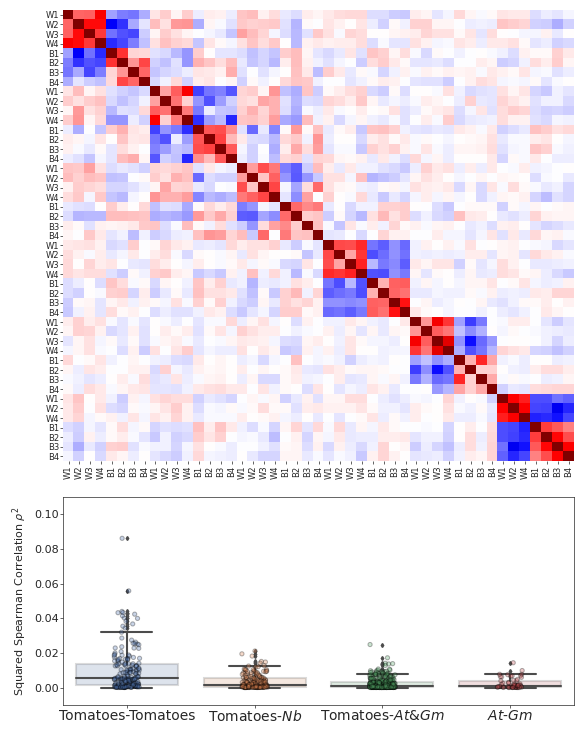

In [40]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 7.5))

hea = plt.subplot2grid((6, 1), (0, 0), rowspan=4)
box = plt.subplot2grid((6, 1), (4, 0), rowspan=2)


axes = [hea, box]
annotate_axes(axes)

### Define some arrays ###

heat_labels = [x.replace("_", "") for x in compare_pca.T.corr(method='spearman').index.to_numpy()]
heat_labels = [re.search('[slycperunNbGmAt]+([WB1-4]+)', x).group(1) for x in heat_labels]

sns.heatmap(compare_pca.T.corr(method='spearman'), annot=False, cmap='seismic', cbar=False, cbar_kws={"use_gridspec":False, "location":"top", "shrink":0.5}, annot_kws={"size": 2}, vmin=-1, vmax=1, xticklabels=True, yticklabels=True, ax=hea)
#hea.set_yticklabels(heat_ylabels, size=2)
hea.set_yticklabels(heat_labels, fontsize = 6)
hea.set_xticklabels(heat_labels, fontsize = 6, rotation=90)


box.set_ylim(-0.01, 0.11)

sns.boxplot(data=corr_box_diff, x='detail_visualisation', y='correlation_squared', order=['tom_tom', 'Nb_tom', 'tom_other', 'other_other'], fliersize=2, boxprops={'alpha':0.2}, ax=box)
sns.stripplot(data=corr_box_diff, x='detail_visualisation', y='correlation_squared', order=['tom_tom', 'Nb_tom', 'tom_other', 'other_other'], s=3, dodge=True, edgecolor='black', linewidth=0.75, alpha=0.3, ax=box)

box.set_xlabel('')
box.set_ylabel('Squared Spearman Correlation $ρ^2$', fontsize=8)
box.set_xticklabels(['Tomatoes-Tomatoes', 'Tomatoes-$\itNb$', 'Tomatoes-$\itAt$&$\itGm$', '$\itAt$-$\itGm$'], fontsize=10)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure7_jupyter_spearman.png', dpi=200, transparent=True)
plt.show()

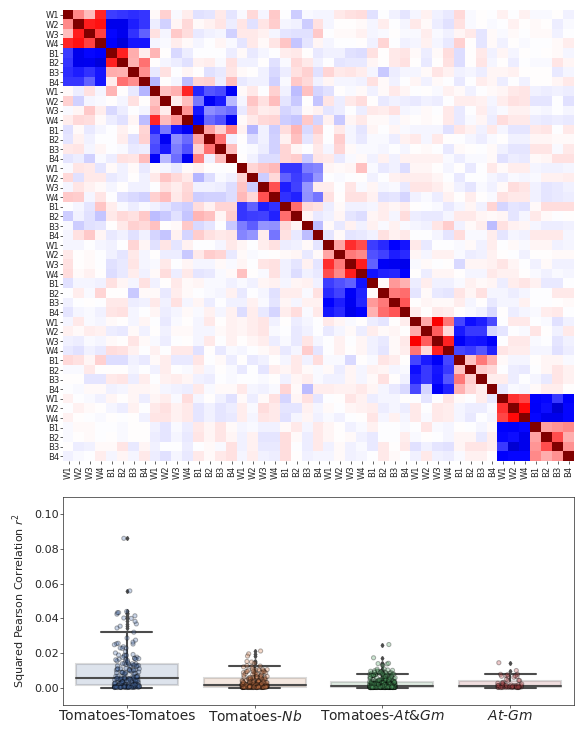

In [41]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 7.5))

hea = plt.subplot2grid((6, 1), (0, 0), rowspan=4)
box = plt.subplot2grid((6, 1), (4, 0), rowspan=2)


axes = [hea, box]
annotate_axes(axes)

### Define some arrays ###

heat_labels = [x.replace("_", "") for x in compare_pca.T.corr().index.to_numpy()]
heat_labels = [re.search('[slycperunNbGmAt]+([WB1-4]+)', x).group(1) for x in heat_labels]

sns.heatmap(compare_pca.T.corr(method='pearson'), annot=False, cmap='seismic', cbar=False, cbar_kws={"use_gridspec":False, "location":"top", "shrink":0.5}, annot_kws={"size": 2}, vmin=-1, vmax=1, xticklabels=True, yticklabels=True, ax=hea)
#hea.set_yticklabels(heat_ylabels, size=2)
hea.set_yticklabels(heat_labels, fontsize = 6)
hea.set_xticklabels(heat_labels, fontsize = 6, rotation=90)


box.set_ylim(-0.01, 0.11)

sns.boxplot(data=corr_box_diff, x='detail_visualisation', y='correlation_squared', order=['tom_tom', 'Nb_tom', 'tom_other', 'other_other'], fliersize=2, boxprops={'alpha':0.2}, ax=box)
sns.stripplot(data=corr_box_diff, x='detail_visualisation', y='correlation_squared', order=['tom_tom', 'Nb_tom', 'tom_other', 'other_other'], s=3, dodge=True, edgecolor='black', linewidth=0.75, alpha=0.3, ax=box)

box.set_xlabel('')
box.set_ylabel('Squared Pearson Correlation $r^2$', fontsize=8)
box.set_xticklabels(['Tomatoes-Tomatoes', 'Tomatoes-$\itNb$', 'Tomatoes-$\itAt$&$\itGm$', '$\itAt$-$\itGm$'], fontsize=10)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure7_jupyter.png', dpi=200, transparent=True)
plt.show()

## Figure 8 - visualise how many OGs for 80 percent - pareto?

In [42]:
tom_tom = corr_box_diff[(corr_box_diff.detail_visualisation == 'tom_tom')].correlation_squared.to_numpy()
nb_tom = corr_box_diff[(corr_box_diff.detail_visualisation == 'Nb_tom')].correlation_squared.to_numpy()
tom_other = corr_box_diff[(corr_box_diff.detail_visualisation == 'tom_other')].correlation_squared.to_numpy()
nb_other = corr_box_diff[(corr_box_diff.detail_visualisation == 'Nb_other')].correlation_squared.to_numpy()
other_other = corr_box_diff[(corr_box_diff.detail_visualisation == 'other_other')].correlation_squared.to_numpy()

In [43]:
gm_test = ['NP_001237585.2', 'XP_003544157.1', 'XP_006595881.1', 'XP_006596615.1']
gm_og = ['OG0004043']

In [44]:
def test_ids(df, change_names_array):
    new = []
    new_reps = []
    
    tmp = df[df.predicted_secretion == True]
    tmp = tmp.rename(columns=change_names_array)
    tmp.drop(columns=['predicted_secretion'], inplace=True)
    
    for row in tmp.index:
        prots = row.split(';')
        prots = [x.replace(' ', '') for x in prots]
        
        tmp_mean = []
        for col in tmp.columns:
            if 'B' in col:
                tot = np.sum(tmp[col])
                share = 100*tmp.loc[row, col]/tot
                tmp_mean.append(share)
                
        if tmp_mean.count(0) < 3:
            tmp_mean = [i for i in tmp_mean if i != 0]
        
        for prot in prots:
            if prot in gm_test:
                new.append([prot, np.mean(tmp_mean)])

    tmp = tmp[tmp.index.isin(sbts)]
    new = pd.DataFrame(new, columns=['name', 'fraction'])
    new.index = new['name']
    new.drop(columns=['name'], inplace=True)
    
    return(new)

In [45]:
dfs = [gm_ogs.T, at_ogs.T, nb_ogs.T, sl_ogs.T, speru_ogs.T, spen_ogs.T]
species = ['gm', 'at', 'nb', 'sl', 'sr', 'sn']

new = []
new_mean = []

for og in rel_ogs.index:
    for spec, df in zip(species, dfs):
        tmp_m = []
        tmp_b = []
        for col in df.columns:

            tot = np.sum(df[col].to_numpy())
            fra = df.loc[og, col]/tot
            
            if 'W' in col:
                treat = 'Mock'
                tmp_m.append(fra)
                
            elif 'B' in col:
                treat = 'Bion'
                tmp_b.append(fra)
                
            else:
                print('ERROR')

            
            new.append([og, spec, col, treat, fra])
            
        if tmp_m.count(0) < 3:
            tmp_m = [i for i in tmp_m if i != 0]
            
        if tmp_b.count(0) < 3:
            tmp_b = [i for i in tmp_b if i != 0]
            
        new_mean.append([og, spec, 'Mock', np.mean(tmp_m)])
        new_mean.append([og, spec, 'Bion', np.mean(tmp_b)])

imsec_reps = pd.DataFrame(new, columns=['orthogroup', 'species', 'replicate', 'treatment', 'fraction'])
imsec = pd.DataFrame(new_mean, columns=['orthogroup', 'species', 'treatment', 'fraction'])
imsec_mock = imsec[imsec.treatment == 'Mock']
imsec = imsec[imsec.treatment == 'Bion']
imsec.index = imsec['orthogroup']
imsec.drop(columns=['orthogroup'], inplace=True)

In [46]:
def species_imsec(df, species):
    new = df[df.species == species]
    new = new.sort_values(by='fraction', ascending=False)
    tot = 0
    for counter, og in enumerate(new.index):
        fra = new.loc[og, 'fraction']
        tot += fra
        new.loc[og, 'total'] = tot
        new.loc[og, 'counter'] = counter
        
    return(new)

In [47]:
# find_nearest from 'https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array'

def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return a.flat[idx]

In [48]:
sl_imsec = species_imsec(imsec, 'sl')
sr_imsec = species_imsec(imsec, 'sr')
sn_imsec = species_imsec(imsec, 'sn')
nb_imsec = species_imsec(imsec, 'nb')
gm_imsec = species_imsec(imsec, 'gm')
at_imsec = species_imsec(imsec, 'at')

In [49]:
sl_imsec_mock = species_imsec(imsec_mock, 'sl')
sr_imsec_mock = species_imsec(imsec_mock, 'sr')
sn_imsec_mock = species_imsec(imsec_mock, 'sn')
nb_imsec_mock = species_imsec(imsec_mock, 'nb')
gm_imsec_mock = species_imsec(imsec_mock, 'gm')
at_imsec_mock = species_imsec(imsec_mock, 'at')

In [50]:
fa_inc = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/pareto_ogs_functional_annotation.csv', sep=',', index_col=0)
fa_par = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/orthogroups_annotated.tsv', sep='\t', index_col=0)

In [51]:
def heatmap_df(data, species, increase_info, at_ogs_log2_comp, ogs_molw, fa_par, fa_inc):
    print(data.head())
    new = pd.pivot_table(data[data.species == species], values='fraction', index='orthogroup', columns='replicate')
    new_df = []
    print(new.head())
    
    for row in new.index:
        b_tmp = []
        w_tmp = []
        
        for col in new.columns:
            print(col)
            val = new.loc[row, col]
            
            if 'B' in col:
                b_tmp.append(val)
                
            elif 'W' in col:
                w_tmp.append(val)
                
            else:
                print("ERROR")
                
        b_mean = np.mean(b_tmp)
        w_mean = np.mean(w_tmp)
    
        log2fc = np.log2(b_mean) - np.log2(w_mean)
        
        if row in increase_info.index:
            increa = increase_info.loc[row, 'fdr_bh_correction_p_value']

        else:
            increa = False
            
            
        molwei = ogs_molw.loc[row, 'mol_weight_mature_kDa']
        
        if row in fa_par.index:
            functa = fa_par.loc[row, 'category']
            
        elif row in fa_inc.index:
            functa = fa_inc.loc[row, 'category']
            
        else:
            functa = None
            
        if pd.isna(functa) == False:
            if functa[:2] == 'PR':
                prprot = True
            
        else:
            prprot = False

        print(w_tmp)
        print(b_tmp)
        new_df.append([row, species, w_tmp[0], w_tmp[1], w_tmp[2], w_tmp[3], b_tmp[0], b_tmp[1], b_tmp[2], b_tmp[3], w_mean, b_mean, log2fc, molwei, increa, functa, prprot])
        
    new_df = pd.DataFrame(new_df, columns=['orthogroup', 'species', '{}_M1'.format(species), '{}_M2'.format(species), '{}_M3'.format(species), '{}_M4'.format(species), '{}_B1'.format(species), '{}_B2'.format(species), '{}_B3'.format(species), '{}_B4'.format(species), 'M_mean', 'B_mean', 'log2FC', 'molecular_weight_kDa', 'sign_incr', 'functional_annotation', 'PR'])
 
    return(new_df)

In [52]:
sl_heat = ms.heatmap_df(imsec_reps, 'sl', sl_ogs_log2_comp_change, sl_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
sr_heat = ms.heatmap_df(imsec_reps, 'sr', speru_ogs_log2_comp_change, speru_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
sn_heat = ms.heatmap_df(imsec_reps, 'sn', spen_ogs_log2_comp_change, spen_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
nb_heat = ms.heatmap_df(imsec_reps, 'nb', nb_ogs_log2_comp_change, nb_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
at_heat = ms.heatmap_df(imsec_reps, 'at', at_ogs_log2_comp_change, at_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
gm_heat = ms.heatmap_df(imsec_reps, 'gm', gm_ogs_log2_comp_change, gm_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)

## Compare At, Gm and Nb MS to Gel

In [53]:
top_ogs = []

for dfs in [nb_heat, at_heat, gm_heat]:
    [top_ogs.append(x) for x in dfs.head(10).index]
    
top_ogs = np.unique(top_ogs)

In [54]:
nb_top_ogs = []
at_top_ogs = []
gm_top_ogs = []

[nb_top_ogs.append(x) for x in nb_heat.head(10).index]
[at_top_ogs.append(x) for x in at_heat.head(10).index]
[gm_top_ogs.append(x) for x in gm_heat.head(10).index]

[None, None, None, None, None, None, None, None, None, None]

In [55]:
log2fc = []
pshare = []

for og in top_ogs:

    mw = float("{:.1f}".format(sl_heat.loc[og, 'molecular_weight_kDa']))
    
    fa = sl_heat.loc[og, 'functional_annotation']
    
#    sl_log2fc = sl_heat.loc[og, 'log2FC']
#    sr_log2fc = sr_heat.loc[og, 'log2FC']
#    sn_log2fc = sn_heat.loc[og, 'log2FC']
    nb_log2fc = nb_heat.loc[og, 'log2FC']
    at_log2fc = at_heat.loc[og, 'log2FC']
    gm_log2fc = gm_heat.loc[og, 'log2FC']

    
#    sl_pshare = float("{:.1f}".format(sl_heat.loc[og, 'B_mean']*100))
#    sr_pshare = float("{:.1f}".format(sr_heat.loc[og, 'B_mean']*100))
#    sn_pshare = float("{:.1f}".format(sn_heat.loc[og, 'B_mean']*100))
    nb_pshare = float("{:.1f}".format(nb_heat.loc[og, 'B_mean']*100))
    at_pshare = float("{:.1f}".format(at_heat.loc[og, 'B_mean']*100))
    gm_pshare = float("{:.1f}".format(gm_heat.loc[og, 'B_mean']*100))

#    sr_pshare = sr_heat.loc[og, 'B_mean']*100
#    sn_pshare = sn_heat.loc[og, 'B_mean']*100
    
    pshare.append([og, mw, fa, gm_pshare, at_pshare, nb_pshare])
    log2fc.append([og, mw, fa, gm_log2fc, at_log2fc, nb_log2fc])
    
hi_pshare = pd.DataFrame(pshare, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Gm_share', 'At_share', 'Nb_share'])
hi_log2fc = pd.DataFrame(log2fc, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Gm_share', 'At_share', 'Nb_share'])

In [56]:
hi_pshare.sort_values(by='mol_weight', ascending=False)

,orthogroups,mol_weight,functional_annotation,Gm_share,At_share,Nb_share
21,OG0020321,82.8,Other GH,2.8,0.1,0.0
20,OG0018889,80.8,NaN,0.0,0.0,4.0
1,OG0002226,79.6,Esterase,0.0,1.3,0.0
16,OG0015898,78.8,S8 (SBT),1.8,0.0,0.1
5,OG0004043,75.8,S8 (SBT),9.0,0.0,0.0
6,OG0004822,75.2,subtilase,6.3,0.0,2.7
3,OG0002908,58.6,oxidoreductase,0.7,1.3,0.0
4,OG0003244,58.4,Other,7.4,0.0,0.3
18,OG0016578,53.7,NaN,0.0,2.3,0.0
2,OG0002883,52.2,S10 (SCPL),2.6,0.0,0.1


In [57]:
def process_heatmaps(df, drop_cols):
    new = df.copy()
    new.drop(columns=drop_cols, inplace=True)
    new.sort_values(by='mol_weight', ascending=False, inplace=True)
    new.set_index('mol_weight', inplace=True)
    new.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)
    
    return(new)

In [58]:
nb_hi_heat_share = hi_pshare[hi_pshare.orthogroups.isin(nb_top_ogs)]
at_hi_heat_share = hi_pshare[hi_pshare.orthogroups.isin(at_top_ogs)]
gm_hi_heat_share = hi_pshare[hi_pshare.orthogroups.isin(gm_top_ogs)]

nb_hi_heat_log2fc = hi_log2fc[hi_log2fc.orthogroups.isin(nb_top_ogs)]
at_hi_heat_log2fc = hi_log2fc[hi_log2fc.orthogroups.isin(at_top_ogs)]
gm_hi_heat_log2fc = hi_log2fc[hi_log2fc.orthogroups.isin(gm_top_ogs)]

nb_hi_heat_share = process_heatmaps(nb_hi_heat_share, ['Gm_share', 'At_share'])
at_hi_heat_share = process_heatmaps(at_hi_heat_share, ['Gm_share', 'Nb_share'])
gm_hi_heat_share = process_heatmaps(gm_hi_heat_share, ['Nb_share', 'At_share'])

nb_hi_heat_log2fc = process_heatmaps(nb_hi_heat_log2fc, ['Gm_share', 'At_share'])
at_hi_heat_log2fc = process_heatmaps(at_hi_heat_log2fc, ['Gm_share', 'Nb_share'])
gm_hi_heat_log2fc = process_heatmaps(gm_hi_heat_log2fc, ['Nb_share', 'At_share'])

In [59]:
hi_heat_share = hi_pshare.copy()
hi_heat_share.sort_values(by='mol_weight', ascending=False, inplace=True)
hi_heat_share.set_index('mol_weight', inplace=True)
hi_heat_share.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

hi_heat_log2fc = hi_log2fc.copy()
hi_heat_log2fc.sort_values(by='mol_weight', ascending=False, inplace=True)
hi_heat_log2fc.set_index('mol_weight', inplace=True)
hi_heat_log2fc.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

hi_heat_log2fc.replace(-float('Inf'), 0, inplace=True)

## PR proteins in all six species

In [60]:
pr_ogs_all = []

for df in [nb_heat, at_heat, gm_heat, sl_heat, sr_heat, sn_heat]:
    [pr_ogs_all.append(x) for x in df[(df.PR == True) & (df.sign_incr == True)].index]

pr_ogs_all = np.unique(pr_ogs_all)

In [61]:
pr_ogs = []

for df in [nb_heat, at_heat, gm_heat]:
    [pr_ogs.append(x) for x in df[(df.PR == True) & (df.sign_incr == True)].index]

pr_ogs = np.unique(pr_ogs)

In [62]:
len(pr_ogs)

30

In [63]:
log2fc = []
pshare = []

for og in pr_ogs:

    mw = float("{:.1f}".format(sl_heat.loc[og, 'molecular_weight_kDa']))
    
    fa = sl_heat.loc[og, 'functional_annotation']

    nb_log2fc = nb_heat.loc[og, 'log2FC']
    at_log2fc = at_heat.loc[og, 'log2FC']
    gm_log2fc = gm_heat.loc[og, 'log2FC']

    nb_pshare = float("{:.1f}".format(nb_heat.loc[og, 'B_mean']*100))
    at_pshare = float("{:.1f}".format(at_heat.loc[og, 'B_mean']*100))
    gm_pshare = float("{:.1f}".format(gm_heat.loc[og, 'B_mean']*100))

    
    pshare.append([og, mw, fa, gm_pshare, at_pshare, nb_pshare])
    log2fc.append([og, mw, fa, gm_log2fc, at_log2fc, nb_log2fc])
    
pr_pshare = pd.DataFrame(pshare, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Gm_share', 'At_share', 'Nb_share'])
pr_log2fc = pd.DataFrame(log2fc, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Gm_log2fc', 'At_log2fc', 'Nb_log2fc'])

In [64]:
log2fc = []
pshare = []

for og in pr_ogs:

    mw = float("{:.1f}".format(sl_heat.loc[og, 'molecular_weight_kDa']))
    
    fa = sl_heat.loc[og, 'functional_annotation']

    nb_log2fc = nb_heat.loc[og, 'log2FC']
    at_log2fc = at_heat.loc[og, 'log2FC']
    gm_log2fc = gm_heat.loc[og, 'log2FC']

    nb_pshare = float("{:.1f}".format(nb_heat.loc[og, 'B_mean']*100))
    at_pshare = float("{:.1f}".format(at_heat.loc[og, 'B_mean']*100))
    gm_pshare = float("{:.1f}".format(gm_heat.loc[og, 'B_mean']*100))

    
    pshare.append([og, mw, fa, gm_pshare, at_pshare, nb_pshare])
    log2fc.append([og, mw, fa, gm_log2fc, at_log2fc, nb_log2fc])
    
pr_pshare = pd.DataFrame(pshare, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Gm_share', 'At_share', 'Nb_share'])
pr_log2fc = pd.DataFrame(log2fc, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Gm_log2fc', 'At_log2fc', 'Nb_log2fc'])

In [65]:
at_ogs_log2_comp.loc['OG0015386']

At_W1                       3.150104e+01
At_W2                       3.233958e+01
At_W4                       3.325251e+01
At_B1                       3.279300e+01
At_B2                       3.295057e+01
At_B3                       3.243082e+01
At_B4                       3.264054e+01
water_mean                  3.236438e+01
untransformed_water_mean    5.529026e+09
bion_mean                   3.270373e+01
untransformed_bion_mean     6.995275e+09
log2FC                      3.393554e-01
log2FC_var                  8.164936e-01
log2FC_sd                   9.036004e-01
p_value                     4.782349e-01
ratio_wb_untransformed      5.585362e-01
ratio_wb                    5.026077e-01
Name: OG0015386, dtype: float64

In [66]:
hi_pshare.sort_values(by='mol_weight', ascending=False)

,orthogroups,mol_weight,functional_annotation,Gm_share,At_share,Nb_share
21,OG0020321,82.8,Other GH,2.8,0.1,0.0
20,OG0018889,80.8,NaN,0.0,0.0,4.0
1,OG0002226,79.6,Esterase,0.0,1.3,0.0
16,OG0015898,78.8,S8 (SBT),1.8,0.0,0.1
5,OG0004043,75.8,S8 (SBT),9.0,0.0,0.0
6,OG0004822,75.2,subtilase,6.3,0.0,2.7
3,OG0002908,58.6,oxidoreductase,0.7,1.3,0.0
4,OG0003244,58.4,Other,7.4,0.0,0.3
18,OG0016578,53.7,NaN,0.0,2.3,0.0
2,OG0002883,52.2,S10 (SCPL),2.6,0.0,0.1


In [70]:
pr_pshare.sort_values(by='mol_weight', ascending=False)

,orthogroups,mol_weight,functional_annotation,Gm_share,At_share,Nb_share
0,OG0000168,76.6,PR7,0.0,0.0,2.0
21,OG0018403,49.7,PR2,0.0,0.0,0.0
3,OG0003114,40.6,PR2,0.0,0.0,0.0
5,OG0005908,37.2,PR2,0.0,0.0,0.0
20,OG0018372,35.7,PR9,0.0,0.3,0.0
16,OG0011507,35.1,PR2,0.0,0.0,10.6
4,OG0005304,34.8,PR2,20.0,2.3,0.0
24,OG0025995,34.1,PR2,0.0,7.0,0.0
1,OG0000840,34.0,PR9,0.2,0.0,0.1
19,OG0017238,33.9,PR2,0.7,0.0,0.0


In [71]:
pr_heat_share = pr_pshare.copy()
pr_heat_share.sort_values(by='mol_weight', ascending=False, inplace=True)
pr_heat_share.set_index('mol_weight', inplace=True)
pr_heat_share.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

pr_heat_log2fc = pr_log2fc.copy()
pr_heat_log2fc.sort_values(by='mol_weight', ascending=False, inplace=True)
pr_heat_log2fc.set_index('mol_weight', inplace=True)
pr_heat_log2fc.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

In [72]:
a = at_ogs_log2_comp[at_ogs_log2_comp.log2FC > 0.9]
info = multi.multipletests(a['p_value'], alpha=0.05, method='fdr_bh')
a['fdr_bh_correction_pvalue'] = info[0]
a['fdr_bh_correction'] = info[1]

<ipython-input-72-da7c03b6bed3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['fdr_bh_correction_pvalue'] = info[0]
<ipython-input-72-da7c03b6bed3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['fdr_bh_correction'] = info[1]


<ipython-input-73-b7ea21aabb2b>:55: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


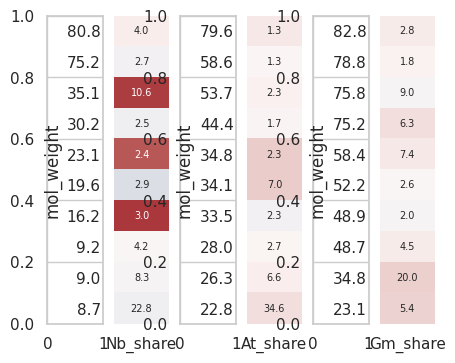

In [73]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(5, 4))

dims = (1, 6)

nb_gel = plt.subplot2grid(dims, (0, 0))
nb = plt.subplot2grid(dims, (0, 1))
at_gel = plt.subplot2grid(dims, (0, 2))
at = plt.subplot2grid(dims, (0, 3))
gm_gel = plt.subplot2grid(dims, (0, 4))
gm = plt.subplot2grid(dims, (0, 5))

axes = [nb_gel, nb, at_gel, at, gm_gel, gm]
gels = [nb_gel, at_gel, gm_gel]


### Define some arrays ###

#boxplots = [raw_boxL, raw_boxR, raw_boxS]
#boxplots_spec = ['$\it{S.lycopersicum}$', '$\it{S.peruvianum}$', '$\it{S.pennellii}$']
#boxplots_spec = ['S.lycopersicum', 'S.peruvianum', 'S.pennellii']

#sl_order = ['LFQ_intensity_AF_W_11', 'LFQ_intensity_AF_W_12', 'LFQ_intensity_AF_W_13', 'LFQ_intensity_AF_W_14', 'LFQ_intensity_AF_B_16', 'LFQ_intensity_AF_B_17', 'LFQ_intensity_AF_B_18', 'LFQ_intensity_AF_B_19']
#speru_order = ['LFQ_intensity_AF_W_01', 'LFQ_intensity_AF_W_02', 'LFQ_intensity_AF_W_03', 'LFQ_intensity_AF_W_04', 'LFQ_intensity_AF_B_06', 'LFQ_intensity_AF_B_07', 'LFQ_intensity_AF_B_08', 'LFQ_intensity_AF_B_09']
#box_labels = ['M1', 'M2', 'M3', 'M4', 'B1', 'B2', 'B3', 'B4']
#raw_LFQ = [raw_LFQL, raw_LFQR, raw_LFQS]
#ranks = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB]

### Generate individual plots ###

for df_show, df_annot, axe in zip([nb_hi_heat_log2fc, at_hi_heat_log2fc, gm_hi_heat_log2fc], [nb_hi_heat_share, at_hi_heat_share, gm_hi_heat_share], [nb, at, gm]):
    sns.heatmap(data=df_show, annot=df_annot, annot_kws={"size": 7}, fmt='.1f', cmap='vlag', cbar=False, vmin=-7, vmax=7, yticklabels=True, ax=axe)

for gel in gels:
    gel.set_ylabel('')
    gel.set_xlabel('')

#pr_heat.set_yticks(rotation=0) 
#pr_heat.set_xticklabels(['Sl', 'Sr', 'Sn'], fontsize=10)



plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Figure4b_heatmaps_jupyter.svg', transparent=True)
plt.show()

## Correlate Gel and MS log2FC of PR proteins

In [74]:
names = ['M', 'B']

gm_40kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Gm_pooled_2nd_band.csv', sep=',', index_col=0)
gm_40kda.index = names
gm_40kda.rename(columns={"Area":"40kDa"}, inplace=True)

gm_30kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Gm_pooled_3rd_band.csv', sep=',', index_col=0)
gm_30kda.index = names
gm_30kda.rename(columns={"Area":"30kda"}, inplace=True)

gm_15kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Gm_pooled_4th_band.csv', sep=',', index_col=0)
gm_15kda.index = names
gm_15kda.rename(columns={"Area":"15kda"}, inplace=True)

gm_pr_pool = gm_40kda.copy()
gm_pr_pool['30kDa'] = gm_30kda['30kda']
gm_pr_pool['15kDa'] = gm_15kda['15kda']
gm_pr_pool

,40kDa,30kDa,15kDa
M,42401.952,23895.149,5936.563
B,52465.392,62321.563,56504.889


In [75]:
names = ['M', 'B']

at_40kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/At_pooled_2nd_band.csv', sep=',', index_col=0)
at_40kda.index = names
at_40kda.rename(columns={"Area":"40kDa"}, inplace=True)

at_30kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/At_pooled_3rd_band.csv', sep=',', index_col=0)
at_30kda.index = names
at_30kda.rename(columns={"Area":"30kda"}, inplace=True)

at_15kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/At_pooled_4th_band.csv', sep=',', index_col=0)
at_15kda.index = names
at_15kda.rename(columns={"Area":"15kda"}, inplace=True)

at_pr_pool = at_40kda.copy()
at_pr_pool['30kDa'] = at_30kda['30kda']
at_pr_pool['15kDa'] = at_15kda['15kda']
at_pr_pool

,40kDa,30kDa,15kDa
M,25773.966,33865.593,11338.823
B,67080.149,72471.614,67545.706


In [76]:
names = ['M', 'B']
nb_30kDa_names = ['M', 'M', 'B']
nb_15kDa_names = ['M', 'M', 'M', 'M', 'B']

nb_40kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Nb_pooled_2nd_band.csv', sep=',', index_col=0)
nb_40kda.index = names
nb_40kda.rename(columns={"Area":"40kDa"}, inplace=True)

nb_30kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Nb_pooled_3rd_band.csv', sep=',', index_col=0)
nb_30kda.index = nb_30kDa_names
new = []
for nam in names:
    tmp = nb_30kda[nb_30kda.index == nam]
    val = np.sum(tmp.Area)
    new.append([nam, val])
nb_30kda = pd.DataFrame(new, columns=['treat', '30kda'])
nb_30kda.index = nb_30kda['treat']
nb_30kda.drop(columns=['treat'], inplace=True)


nb_15kda = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Nb_pooled_4th_band.csv', sep=',', index_col=0)
nb_15kda.index = nb_15kDa_names
new = []
for nam in names:
    tmp = nb_15kda[nb_15kda.index == nam]
    val = np.sum(tmp.Area)
    new.append([nam, val])
nb_15kda = pd.DataFrame(new, columns=['treat', '15kda'])
nb_15kda.index = nb_15kda['treat']
nb_15kda.drop(columns=['treat'], inplace=True)

nb_pr_pool = nb_40kda.copy()
nb_pr_pool['30kDa'] = nb_30kda['30kda']
nb_pr_pool['15kDa'] = nb_15kda['15kda']
nb_pr_pool

,40kDa,30kDa,15kDa
M,7491.187,2574.037,2021.279
B,65711.534,64129.212,22240.115


In [77]:
def increase_prs(heatmap, df, pr_array):
    new = []
    for pr in pr_array:
#        og = heatmap[(heatmap.sign_incr == True) & (heatmap.functional_annotation == pr)].index
        og = heatmap[(heatmap.functional_annotation == pr)].index
        tmp = df[df.index.isin(og)]
        
        tmp_m = tmp.water_mean.to_numpy()
        val_m = np.log2(np.sum(2**tmp_m))
        
        tmp_b = tmp.bion_mean.to_numpy()
        val_b = np.log2(np.sum(2**tmp_b))

        incr = 2**(val_b - val_m)
       
        new.append([pr, incr])
    
    new = pd.DataFrame(new, columns=['PR_prot', 'Increase_MS'])
    return(new)   

In [78]:
gm_pr_ms = increase_prs(gm_heat, gm_ogs_log2_comp, ['PR1', 'PR2', 'PR3', 'PR17'])
at_pr_ms = increase_prs(at_heat, at_ogs_log2_comp, ['PR1', 'PR2', 'PR3', 'PR5', 'PR17'])
nb_pr_ms = increase_prs(nb_heat, nb_ogs_log2_comp, ['PR1', 'PR2', 'PR3', 'PR17'])

In [79]:
band_to_pr_dic = {"PR1":"15kDa",
                "PR14":"15kDa",
                "PR2":"40kDa",
                "PR3":"30kDa",
                "PR5":"30kDa",
                "PR9":"30kDa",
                "PR17":"30kDa"}

In [80]:
def corr_gel_ms(df_ge, df_ms, dic, species):
    
    new = []
    
    for pr in dic.keys():
        band = dic[pr]
        
        if pr in df_ms.PR_prot.to_numpy():
            ms_incr = np.log2(df_ms[df_ms.PR_prot == pr].Increase_MS.to_numpy()[0])
            ge_incr = np.log2(df_ge.loc['B', band]/df_ge.loc['M', band])

#        ms_incr = df_ms[df_ms.PR_prot == pr].Increase_MS.to_numpy()[0]
#        ge_incr = df_ge.loc['B', band]/df_ge.loc['M', band]

            new.append([species, '{}_{}'.format(pr, band), ge_incr, ms_incr])
        
    new = pd.DataFrame(new, columns=['Species', 'Comparison', 'gel_increase', 'ms_increase'])
    return(new)    

In [81]:
gm_corr = corr_gel_ms(gm_pr_pool, gm_pr_ms, band_to_pr_dic, 'Gm')
at_corr = corr_gel_ms(at_pr_pool, at_pr_ms, band_to_pr_dic, 'At')
nb_corr = corr_gel_ms(nb_pr_pool, nb_pr_ms, band_to_pr_dic, 'Nb')

In [82]:
corr_plot = gm_corr.append([at_corr, nb_corr], ignore_index=True)

In [83]:
# rename comaprisons

name_dic = {"PR1_15kDa":'PR1-III',
            'PR2_40kDa':'PR2-I',
            'PR3_30kDa':'PR3-II',
            "PR9_30kDa":'PR9-II',
            'PR14_15kDa':'PR14-III',
            'PR5_30kDa':'PR5-II',
            'PR17_30kDa':'PR17-II'}


for i in corr_plot.index:
    corr_plot.loc[i, 'Comparison'] = name_dic[corr_plot.loc[i, 'Comparison']]
    
corr_plot

,Species,Comparison,gel_increase,ms_increase
0,Gm,PR1-III,3.250676,26.360834
1,Gm,PR2-I,0.307235,1.554044
2,Gm,PR3-II,1.383014,1.030633
3,Gm,PR17-II,1.383014,1.380960
4,At,PR1-III,2.574593,0.339355
5,At,PR2-I,1.379971,1.580797
6,At,PR3-II,1.097596,0.436569
7,At,PR5-II,1.097596,1.005525
8,At,PR17-II,1.097596,0.125830
9,Nb,PR1-III,3.459824,6.832695


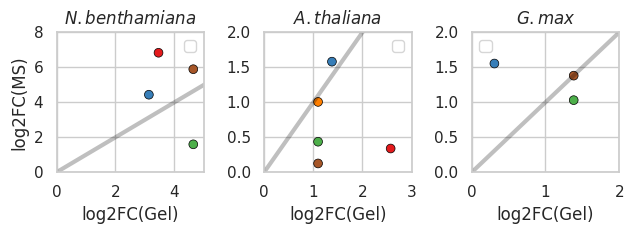

In [84]:
#col_dic = {"PR1_15kDa":'#e41a1c',
#            'PR2_40kDa':'#377eb8',
#            'PR3_30kDa':'#4daf4a',
#            "PR9_30kDa":'black',
#            'PR14_15kDa':'#ffff33',
#            'PR5_30kDa':'#ff7f00',
#            'PR17_30kDa':'#a65628'}

col_dic = {"PR1-III":'#e41a1c',
            'PR2-I':'#377eb8',
            'PR3-II':'#4daf4a',
            "PR9-II":'black',
            'PR14-III':'#ffff33',
            'PR5-II':'#ff7f00',
            'PR17-II':'#a65628'}

#names = ['Comparison', 'PR1-III', 'PR14-III', 'PR2-I', 'PR3-II', 'PR5-II', 'PR9-II', 'PR17-II', 'Species', '$\itG.max$', '$\itA.tha$', '$\itN.ben$']
gm_names = ['PR1-III', 'PR2-I', 'PR3-II', 'PR9-II', 'PR14-III', 'PR17-II']
at_names = ['PR1-III', 'PR2-I', 'PR3-II', 'PR5-II', 'PR9-II', 'PR14-III', 'PR17-II']
nb_names = ['PR1-III', 'PR2-I', 'PR3-II', 'PR9-II', 'PR14-III', 'PR17-II']

names = [nb_names, at_names, gm_names]
ranges = [[(0, 5), (0, 8)], [(0, 3), (0, 2)], [(0, 2), (0, 2)]]

species = ['Nb', 'At', 'Gm']
spec_na = ['$\itN.benthamiana$', '$\itA.thaliana$', '$\itG.max$']
counter = 0

fig, axe = plt.subplots(1, 3, figsize=(6.5, 2.5))


for spec, name, name_order, rang in zip(species, spec_na, names, ranges):
    sns.scatterplot(data=corr_plot[corr_plot.Species == spec], y='ms_increase', x='gel_increase', hue='Comparison', palette=col_dic, s=40, edgecolor='black', linewidth=0.5, ax=axe[counter])
    sns.lineplot(x=np.linspace(0, 10, 2), y=np.linspace(0, 10, 2), color='black', alpha=0.25, linewidth=3, ax=axe[counter])

    axe[counter].set_title(name)
    axe[counter].set_xlim(rang[0])
    axe[counter].set_ylim(rang[1])
    axe[counter].set_xlabel('log2FC(Gel)', fontsize=12)

#    axe[counter].set_ylabel('log2FC(MS)', fontsize=12)
    if spec == 'Nb':
        axe[counter].set_ylabel('log2FC(MS)', fontsize=12)
    else:
        axe[counter].set_ylabel('')
    
    if spec == 'AB':
        handles, labels = axe[counter].get_legend_handles_labels()
        axe[counter].legend(handles, labels, ncol=6, loc=2, prop={"size":7}, markerscale=1)

    else:
        axe[counter].legend('')
    counter += 1
    
#sns.lineplot(x=x_best, y=y_best)
#sns.jointplot(toms_corr.gel_increase, toms_corr.ms_increase, kind='reg')
#sns.lmplot(x='gel_increase', y='ms_increase', data=toms_corr)

plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Figure4b_correlations_jupyter.svg', transparent=True, bbox_inches='tight')
plt.show()

## Overview of combined MS-Gels for six species

In [85]:
comp_dic = {"PR9":['OG0021155', 'OG0007537', 'OG0026889'],
            "PR7":["OG0000168"],
            "PR2":["OG0011507", "OG0025995", "OG0005304"],
            "PR3":["OG0023873", "OG0024567", "OG0011319", "OG0020158", "OG0026491", "OG0036792"],
            "PR8":["OG0006196"],
            "PR5":["OG0006949"],
            "PR17":["OG0006259"],
            "PR1":["OG0016533","OG0002595", "OG0015386", "OG0010787"]}

comp_ogs = []
for i in comp_dic:
    [comp_ogs.append(x) for x in comp_dic[i]]

In [86]:
comp_heat_share = []
comp_heat_log2f = []
heats = [gm_heat, at_heat, nb_heat, sl_heat, sr_heat, sn_heat]

for og in comp_ogs:
    og_vals = []
    og_logs = []
    
    fa = sl_heat.loc[og, 'functional_annotation']
    mw = "{:.1f}".format(sl_heat.loc[og, 'molecular_weight_kDa'])
    
    [og_vals.append(x) for x in [og, mw, fa]]
    [og_logs.append(x) for x in [og, mw, fa]]            

    [og_vals.append(x[x.index == og].B_mean.to_numpy()[0]*100) for x in heats]
    [og_logs.append(x[x.index == og].log2FC.to_numpy()[0]) for x in heats]

    comp_heat_share.append(og_vals)
    comp_heat_log2f.append(og_logs)
    
comp_heat_share = pd.DataFrame(comp_heat_share, columns=['orthogroup', 'molecular_weight_kDa', 'functional_annotation', 'gm', 'at', 'nb', 'sl', 'sr', 'sn'])
comp_heat_share.set_index('molecular_weight_kDa', inplace=True)
comp_heat_share.sort_values(by='molecular_weight_kDa', ascending=False, inplace=True)
comp_heat_share_backup = comp_heat_share.copy()

comp_heat_log2f = pd.DataFrame(comp_heat_log2f, columns=['orthogroup', 'molecular_weight_kDa', 'functional_annotation', 'gm', 'at', 'nb', 'sl', 'sr', 'sn'])
comp_heat_log2f.set_index('molecular_weight_kDa', inplace=True)
comp_heat_log2f.sort_values(by='molecular_weight_kDa', ascending=False, inplace=True)
comp_heat_log2f_backup = comp_heat_log2f.copy()


comp_heat_share.drop(columns=['orthogroup', 'functional_annotation'], inplace=True)
comp_heat_log2f.drop(columns=['orthogroup', 'functional_annotation'], inplace=True)

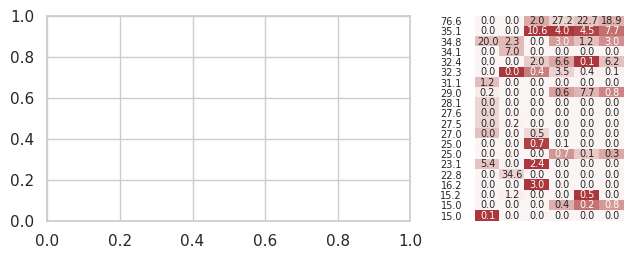

In [87]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 2.75))

dims = (1, 3)

gels = plt.subplot2grid(dims, (0, 0), colspan=2)
heat = plt.subplot2grid(dims, (0, 2), colspan=1)


axes = [gels, heat]


### Define some arrays ###

### Generate individual plots ###

sns.heatmap(data=comp_heat_log2f, annot=comp_heat_share, annot_kws={"size": 7}, fmt='.1f', cmap='vlag', cbar=False, vmin=-5, vmax=5, yticklabels=True, ax=heat)

heat.set_yticklabels(heat.get_yticklabels(), rotation = 0, fontsize = 7)
heat.set_ylabel('')
heat.set_xticklabels(['', '', '', '', '', ''])

#pr_heat.set_yticks(rotation=0) 
#pr_heat.set_xticklabels(['Sl', 'Sr', 'Sn'], fontsize=10)



plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/gel_overview/corrections/Figure4c_heatmaps_jupyter.svg', transparent=True)
plt.show()

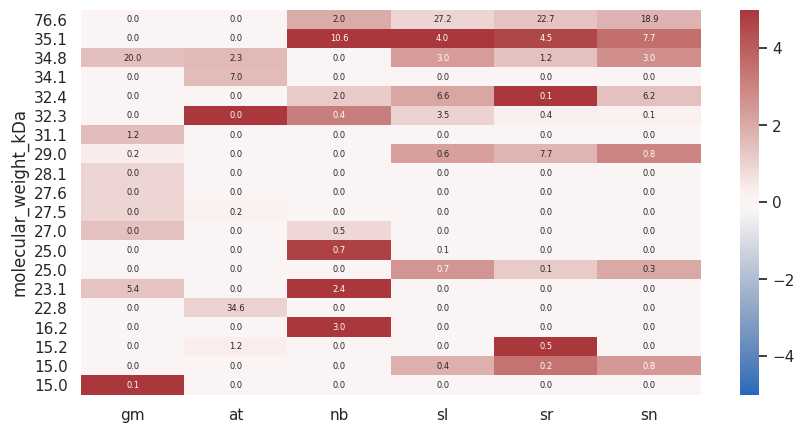

In [88]:
plt.figure(figsize=(10, 5))

sns.heatmap(data=comp_heat_log2f, annot=comp_heat_share, annot_kws={"size": 6}, fmt='.1f', cmap='vlag', cbar=True, vmin=-5, vmax=5, yticklabels=True)

plt.show()

In [230]:
def pareto_ogs_create(df):
    new = []
    cut_og = df[df.total == find_nearest(df['total'].to_numpy(), 0.8)].index[0]
    
    for og in df.index:
        new.append(og)
        if og == cut_og:
            
            break
            
    return(new)

In [231]:
sl_pareto_ogs = pareto_ogs_create(sl_imsec)
sr_pareto_ogs = pareto_ogs_create(sr_imsec)
sn_pareto_ogs = pareto_ogs_create(sn_imsec)
nb_pareto_ogs = pareto_ogs_create(nb_imsec)
gm_pareto_ogs = pareto_ogs_create(gm_imsec)
at_pareto_ogs = pareto_ogs_create(at_imsec)

pareto = np.concatenate([sl_pareto_ogs, sr_pareto_ogs, sn_pareto_ogs, nb_pareto_ogs, gm_pareto_ogs, at_pareto_ogs])
len(np.unique(pareto))

106

In [232]:
for og in np.unique(imsec.index):
    molw = ogs_molw.loc[og][0]
    
    if molw < 20:
        cat = 'under_20'
    elif 20 < molw < 36:
        cat = 'under_36'
        
    elif 36 < molw < 60:
        cat = 'under_60'
        
    elif 60 < molw < 80:
        cat = 'under_80'
    
    else:
        cat = 'over_80'
        
    imsec.loc[og, 'mol_weight_kDa'] = ogs_molw.loc[og][0]
    imsec.loc[og, 'category'] = cat

In [233]:
imsec = imsec.sort_values(by='mol_weight_kDa', ascending=False)

In [234]:
sl_imsec_show = imsec[imsec.species == 'sl'].sort_values(by='mol_weight_kDa', ascending=True)
sr_imsec_show = imsec[imsec.species == 'sr'].sort_values(by='mol_weight_kDa', ascending=True)
sn_imsec_show = imsec[imsec.species == 'sn'].sort_values(by='mol_weight_kDa', ascending=True)
nb_imsec_show = imsec[imsec.species == 'nb'].sort_values(by='mol_weight_kDa', ascending=True)
gm_imsec_show = imsec[imsec.species == 'gm'].sort_values(by='mol_weight_kDa', ascending=True)
at_imsec_show = imsec[imsec.species == 'at'].sort_values(by='mol_weight_kDa', ascending=True)

In [235]:
imsec_annot = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/pareto_ogs_functional_annotation.csv', sep=',', index_col=0)
imsec_annot.drop(columns=['species'], inplace=True)

In [236]:
sl_pareto = pd.concat([sl_imsec, imsec_annot], axis=1, join='inner').sort_values(by='category')
sl_pareto = sl_pareto[sl_pareto.index.isin(sl_pareto_ogs)]

sr_pareto = pd.concat([sr_imsec, imsec_annot], axis=1, join='inner').sort_values(by='category')
sr_pareto = sr_pareto[sr_pareto.index.isin(sr_pareto_ogs)]

sn_pareto = pd.concat([sn_imsec, imsec_annot], axis=1, join='inner').sort_values(by='category')
sn_pareto = sn_pareto[sn_pareto.index.isin(sn_pareto_ogs)]

nb_pareto = pd.concat([nb_imsec, imsec_annot], axis=1, join='inner').sort_values(by='category')
nb_pareto = nb_pareto[nb_pareto.index.isin(nb_pareto_ogs)]

gm_pareto = pd.concat([gm_imsec, imsec_annot], axis=1, join='inner').sort_values(by='category')
gm_pareto = gm_pareto[gm_pareto.index.isin(gm_pareto_ogs)]

at_pareto = pd.concat([at_imsec, imsec_annot], axis=1, join='inner').sort_values(by='category')
at_pareto = at_pareto[at_pareto.index.isin(at_pareto_ogs)]

In [237]:
dfs = [sl_imsec, sr_imsec, sn_imsec, nb_imsec, gm_imsec, at_imsec]
spe = ['slyc', 'sper', 'spen', 'nb', 'gm', 'at']

new = []


for og in np.unique(pareto):
    tmp = []
    for df in dfs:
        tmp.append(df.loc[og, 'fraction'])
        
    new.append([og, tmp[0], tmp[1], tmp[2], tmp[3], tmp[4], tmp[5], np.unique(imsec.loc[og, 'mol_weight_kDa'].to_numpy())[0]])
    
new = pd.DataFrame(new, columns=['orthogroups', 'slyc', 'speru', 'spen', 'nb', 'gm', 'at', 'mol_weight_kDa'])
#new.to_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/pareto_ogs_functional_annotation.tsv', sep='\t', index=False)           

## Plot Pareto OGs for different species

In [238]:
dfs = [gm_pareto, at_pareto, nb_pareto, sl_pareto, sr_pareto, sn_pareto]
for df in dfs:
    print(len(df[df.fraction != 0]))

29
35
25
26
25
27


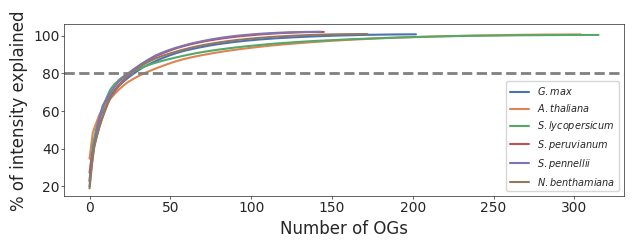

In [239]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=10, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 2.5))

lines = plt.subplot2grid((1, 1), (0, 0))



axes = [lines]
annotate_axes(axes)

### Define some arrays ###

species = ['G.max', 'A.thaliana', 'S.lycopersicum', 'S.peruvianum', 'S.pennellii', 'N.benthamiana']
legend_species = []
[legend_species.append("$\it{}$".format(x)) for x in species]

dfs = [gm_imsec, at_imsec, sl_imsec, sr_imsec, sn_imsec, nb_imsec]
for df in dfs:
    df['perc'] = df['total']*100
    
df = gm_imsec.append([at_imsec, nb_imsec, sl_imsec, sr_imsec, sn_imsec])
df = df[df.fraction != 0]

# Plot lineplots for each species to show pareto OGs

sns.lineplot(data=df, x='counter', y='perc', hue='species', ax=lines)
lines.set_xlabel('Number of OGs', fontsize=12)
lines.set_ylabel('% of intensity explained', fontsize=12)
lines.axhline(80, ls='--', lw=2, c='grey')


'''
for axe, df, spec in zip(axes, dfs, species):
    axe.set_ylim(0, 110)
    axe.set_xlim(-10, 250)
    sns.lineplot(data=df[df.fraction != 0], x='counter', y='perc', ax=axe)
    axe.set_title("$\it{}$".format(spec), fontsize=7)
    axe.set_xlabel('Nb. of OGs', fontsize=7)
    if spec != 'G.max':
        axe.set_ylabel('')
        axe.set_yticklabels('')
    else:
        axe.set_ylabel('% of Intensity Explained', fontsize=8)
    axe.axhline(80, ls='--', lw=1, c='grey')
    axe.tick_params(axis='x', labelsize=7, pad=1)
''' 

handles, labels = lines.get_legend_handles_labels()
lines.legend(handles, legend_species, loc=4, prop={"size":7}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure_pareto_def_report.png', dpi=200, transparent=True)
plt.show()

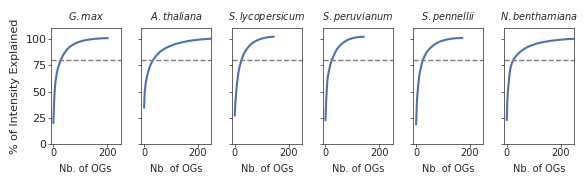

In [240]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 2))

gm = plt.subplot2grid((1, 6), (0, 0))
at = plt.subplot2grid((1, 6), (0, 1))
sl = plt.subplot2grid((1, 6), (0, 2))
sr = plt.subplot2grid((1, 6), (0, 3))
sn = plt.subplot2grid((1, 6), (0, 4))
nb = plt.subplot2grid((1, 6), (0, 5))


axes = [gm, at, sl, sr, sn, nb]
species = ['G.max', 'A.thaliana', 'S.lycopersicum', 'S.peruvianum', 'S.pennellii', 'N.benthamiana']
annotate_axes(axes)

### Define some arrays ###

dfs = [gm_imsec, at_imsec, sl_imsec, sr_imsec, sn_imsec, nb_imsec]
for df in dfs:
    df['perc'] = df['total']*100

# Plot lineplots for each species to show pareto OGs

for axe, df, spec in zip(axes, dfs, species):
    axe.set_ylim(0, 110)
    axe.set_xlim(-10, 250)
    sns.lineplot(data=df[df.fraction != 0], x='counter', y='perc', ax=axe)
    axe.set_title("$\it{}$".format(spec), fontsize=7)
    axe.set_xlabel('Nb. of OGs', fontsize=7)
    if spec != 'G.max':
        axe.set_ylabel('')
        axe.set_yticklabels('')
    else:
        axe.set_ylabel('% of Intensity Explained', fontsize=8)
    axe.axhline(80, ls='--', lw=1, c='grey')
    axe.tick_params(axis='x', labelsize=7, pad=1)
    

#handles, labels = gm.get_legend_handles_labels()
#gm.legend(handles, labels, loc=4, prop={"size":6}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/Figure_pareto_def_report.png', dpi=200, transparent=True)
plt.show()

In [241]:
print("{}:\t{}".format('Gm', len(gm_pareto_ogs)/len(gm_imsec[gm_imsec.fraction != 0])))
print("{}:\t{}".format('At', len(at_pareto_ogs)/len(at_imsec[at_imsec.fraction != 0])))
print("{}:\t{}".format('slyc', len(sl_pareto_ogs)/len(sl_imsec[sl_imsec.fraction != 0])))
print("{}:\t{}".format('speru', len(sr_pareto_ogs)/len(sr_imsec[sr_imsec.fraction != 0])))
print("{}:\t{}".format('spen', len(sn_pareto_ogs)/len(sn_imsec[sn_imsec.fraction != 0])))
print("{}:\t{}".format('Nb', len(nb_pareto_ogs)/len(nb_imsec[nb_imsec.fraction != 0])))

Gm:	0.14285714285714285
At:	0.11475409836065574
slyc:	0.1780821917808219
speru:	0.1736111111111111
spen:	0.15606936416184972
Nb:	0.07911392405063292


## Pareot OGs figure

In [242]:
def pareto_perc(df):
    df['percentage'] = df['fraction']*100
    return(df)

In [243]:
gm_pareto = pareto_perc(gm_pareto)
at_pareto = pareto_perc(at_pareto)
nb_pareto = pareto_perc(nb_pareto)
sl_pareto = pareto_perc(sl_pareto)
sr_pareto = pareto_perc(sr_pareto)
sn_pareto = pareto_perc(sn_pareto)

In [244]:
def check_s8(df):
    s8 = np.sum(df[df.category.isin(['S8', 'PR7'])].fraction)
    return(s8)

In [245]:
for i in [gm_pareto, at_pareto, sl_pareto, sr_pareto, sn_pareto, nb_pareto]:
    print(check_s8(i))

0.0
0.0
0.0
0.0
0.0
0.0


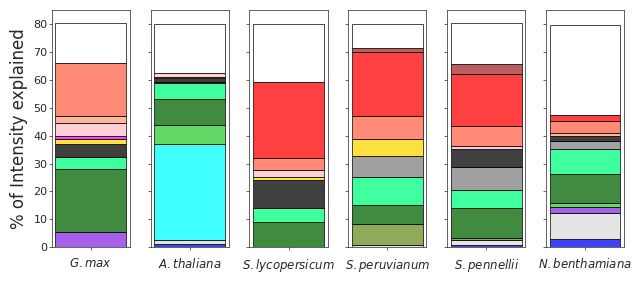

In [252]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 3))

gm = plt.subplot2grid((1, 6), (0, 0))
at = plt.subplot2grid((1, 6), (0, 1))
nb = plt.subplot2grid((1, 6), (0, 2))
sl = plt.subplot2grid((1, 6), (0, 3))
sr = plt.subplot2grid((1, 6), (0, 4))
sn = plt.subplot2grid((1, 6), (0, 5))


axes = [gm, at, nb, sl, sr, sn]
annotate_axes(axes)

### Define some arrays ###

dfs = [gm_pareto, at_pareto, sl_pareto, sr_pareto, sn_pareto, nb_pareto]
species = ['G.max', 'A.thaliana', 'S.lycopersicum', 'S.peruvianum', 'S.pennellii', 'N.benthamiana']
spe = ['gm', 'at', 'sl', 'speru', 'spen', 'nb']
order = ['PR1', 'PR14', 'PR5', 'PR17', 'PR3', 'PR8', 'PR2', 'Other GH', 'PR16', 'PR9', 'PLCP', 'Metallopeptidase', 'Aspartyl peptidase', 'S10 (SCPL)', 'S8 (SBT)', 'PR7 (SBT)', 'Protease inh', 'FAS', 'Other']
order.reverse()
pareto_colours = {'Other':'white',
                 'FAS':'gainsboro',
                 'PR14':'gainsboro',
                 'PR17':'blueviolet',
                 'PR9':'black',
                 'PR1':'blue',
                 'PR5':'aqua',
                 'PR2':'darkgreen',
                 'PR3':'limegreen',
                 'PR8':'olivedrab',
                 'PR16':'gray',
                 'Other GH':'springgreen',
                 'Aspartyl peptidase':'pink',
                 'Metallopeptidase':'magenta',
                 'PLCP':'gold',
                 'PR7 (SBT)':'red',
                 'S8 (SBT)':'tomato',
                 'S10 (SCPL)':'lightsalmon',
                 'Protease inh':'brown'}

# Plot histograms as stacked barplots
'''
for axe, df, spec in zip(axes, dfs, species):
    sns.barplot(data=pareto_perc(df), x='species', y='percentage', hue='category', hue_order=order, palette=pareto_colours, ax=axe)
    break
handles, labels = axe.get_legend_handles_labels()
axe.legend(handles, labels, ncol=5, loc=4, prop={"size":6}, markerscale=0.5)

'''
for axe, df, spec in zip(axes, dfs, species):
    axe.set_ylim(0, 85)
    sns.histplot(data=df, x='species', weights='percentage', hue='category', hue_order=order, palette=pareto_colours, multiple='stack', legend=False, edgecolor='black', linewidth=0.5, shrink=0.8, ax=axe)
    axe.set_xlabel('$\it{}$'.format(spec), fontsize=8.5)
    axe.set_ylabel('')
    axe.set_xticklabels('')
    if spec != 'G.max':
        axe.set_yticklabels('')
        
    else:
        axe.set_ylabel('% of Intensity explained', fontsize=12)
    
#legend = nb.legend()
#handles = legend.legendHandles

#handles, labels = gm.get_legend_handles_labels()
#gm.legend(handles, labels, loc=4, prop={"size":6}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure_pareto_ISs_stacked_jupyter.svg', transparent=True)
plt.show()

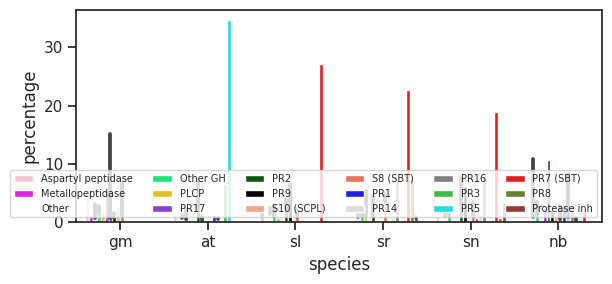

In [253]:
new = gm_pareto.append([at_pareto, sl_pareto, sr_pareto, sn_pareto, nb_pareto])

fig, axes = plt.subplots(1, 1, figsize=(6.5, 3))

sns.barplot(data=new, x='species', y='percentage', hue='category', palette=pareto_colours, ax=axes)

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels, ncol=6, loc=4, prop={"size":7}, markerscale=1)
    
plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure_pareto_ISs_stacked_legend_jupyter.svg', transparent=True)
plt.show()

## Make an in silico gel

## Figure to discuss few OG clusters

In [254]:
gm_pareto_sbt = gm_pareto[gm_pareto.category.isin(['PR7', 'S8'])]
at_pareto_sbt = at_pareto[at_pareto.category.isin(['PR7', 'S8'])]
nb_pareto_sbt = nb_pareto[nb_pareto.category.isin(['PR7', 'S8'])]
sl_pareto_sbt = sl_pareto[sl_pareto.category.isin(['PR7', 'S8'])]
sr_pareto_sbt = sr_pareto[sr_pareto.category.isin(['PR7', 'S8'])]
sn_pareto_sbt = sn_pareto[sn_pareto.category.isin(['PR7', 'S8'])]

gm_pareto_pr2 = gm_pareto[gm_pareto.category.isin(['PR2'])]
at_pareto_pr2 = at_pareto[at_pareto.category.isin(['PR2'])]
nb_pareto_pr2 = nb_pareto[nb_pareto.category.isin(['PR2'])]
sl_pareto_pr2 = sl_pareto[sl_pareto.category.isin(['PR2'])]
sr_pareto_pr2 = sr_pareto[sr_pareto.category.isin(['PR2'])]
sn_pareto_pr2 = sn_pareto[sn_pareto.category.isin(['PR2'])]

gm_pareto_pr3 = gm_pareto[gm_pareto.category.isin(['PR3', 'PR8'])]
at_pareto_pr3 = at_pareto[at_pareto.category.isin(['PR3', 'PR8'])]
nb_pareto_pr3 = nb_pareto[nb_pareto.category.isin(['PR3', 'PR8'])]
sl_pareto_pr3 = sl_pareto[sl_pareto.category.isin(['PR3', 'PR8'])]
sr_pareto_pr3 = sr_pareto[sr_pareto.category.isin(['PR3', 'PR8'])]
sn_pareto_pr3 = sn_pareto[sn_pareto.category.isin(['PR3', 'PR8'])]

gm_pareto_prot = gm_pareto[gm_pareto.category.isin(['plcp', 'aspartyl protease', 'S10', 'PR7', 'S8', 'metalloprotease'])]
at_pareto_prot = at_pareto[at_pareto.category.isin(['plcp', 'aspartyl protease', 'S10', 'PR7', 'S8', 'metalloprotease'])]
nb_pareto_prot = nb_pareto[nb_pareto.category.isin(['plcp', 'aspartyl protease', 'S10', 'PR7', 'S8', 'metalloprotease'])]
sl_pareto_prot = sl_pareto[sl_pareto.category.isin(['plcp', 'aspartyl protease', 'S10', 'PR7', 'S8', 'metalloprotease'])]
sr_pareto_prot = sr_pareto[sr_pareto.category.isin(['plcp', 'aspartyl protease', 'S10', 'PR7', 'S8', 'metalloprotease'])]
sn_pareto_prot = sn_pareto[sn_pareto.category.isin(['plcp', 'aspartyl protease', 'S10', 'PR7', 'S8', 'metalloprotease'])]

gm_pareto_ros = gm_pareto[gm_pareto.category.isin(['ROS'])]
at_pareto_ros = at_pareto[at_pareto.category.isin(['ROS'])]
nb_pareto_ros = nb_pareto[nb_pareto.category.isin(['ROS'])]
sl_pareto_ros = sl_pareto[sl_pareto.category.isin(['ROS'])]
sr_pareto_ros = sr_pareto[sr_pareto.category.isin(['ROS'])]
sn_pareto_ros = sn_pareto[sn_pareto.category.isin(['ROS'])]

In [255]:
def pareto_breakdown(df_imsec_annot, prot_oi, species):
    
    new = []
    
    ogs = df_imsec_annot[df_imsec_annot.category.isin(prot_oi)].index.to_numpy()
    tmp = imsec_reps[(imsec_reps.species == species) & (imsec_reps.treatment == 'Bion') & (imsec_reps.orthogroup.isin(ogs))]
#    tmp = imsec_reps[(imsec_reps.species == species) & (imsec_reps.treatment == 'Bion') & (imsec_reps.orthogroup.isin(array_pareto_OGs))]
    tmp.index = tmp['orthogroup']
    tmp = pd.concat([tmp, df_imsec_annot], axis=1, join='inner')
    
    for rep in np.unique(tmp.replicate):
        for cat in np.unique(tmp.category):
            new.append([species, rep, cat, np.sum(tmp.loc[(tmp.replicate == rep) & (tmp.category == cat)].fraction.to_numpy())*100])

    new = pd.DataFrame(new, columns=['species', 'replicate', 'category', 'fraction'])
    return(new)


'''
def pareto_breakdown_ros(df_imsec_annot, array_pareto_OGs, species):
    
    new = []
    
    tmp = imsec_reps[(imsec_reps.species == species) & (imsec_reps.treatment == 'Bion') & (imsec_reps.orthogroup.isin(array_pareto_OGs))]
    tmp.index = tmp['orthogroup']
    tmp = pd.concat([tmp, df_imsec_annot], axis=1, join='inner')
    for rep in np.unique(tmp.replicate):
        for cat in np.unique(tmp.category):
            for functA in np.unique(tmp['class'].to_numpy):
                new.append([species, rep, cat, np.sum(tmp.loc[(tmp.replicate == rep) & (tmp.category == cat) & (tmp.loc[:, ['class'] == ])].fraction.to_numpy())*100])

#    new = pd.DataFrame(new, columns=['species', 'replicate', 'category', 'fraction'])

#    return(new)

'''

"\ndef pareto_breakdown_ros(df_imsec_annot, array_pareto_OGs, species):\n    \n    new = []\n    \n    tmp = imsec_reps[(imsec_reps.species == species) & (imsec_reps.treatment == 'Bion') & (imsec_reps.orthogroup.isin(array_pareto_OGs))]\n    tmp.index = tmp['orthogroup']\n    tmp = pd.concat([tmp, df_imsec_annot], axis=1, join='inner')\n    for rep in np.unique(tmp.replicate):\n        for cat in np.unique(tmp.category):\n            for functA in np.unique(tmp['class'].to_numpy):\n                new.append([species, rep, cat, np.sum(tmp.loc[(tmp.replicate == rep) & (tmp.category == cat) & (tmp.loc[:, ['class'] == ])].fraction.to_numpy())*100])\n\n#    new = pd.DataFrame(new, columns=['species', 'replicate', 'category', 'fraction'])\n\n#    return(new)\n\n"

In [256]:
gm_pareto_pr2_comp = pareto_breakdown(imsec_annot, ['PR2'], 'gm')
gm_pareto_pr3_comp = pareto_breakdown(imsec_annot, ['PR3', 'PR8'], 'gm')
gm_pareto_sbt_comp = pareto_breakdown(imsec_annot, ['S8 (SBT)', 'PR7 (SBT)'], 'gm')
gm_pareto_prot_comp = pareto_breakdown(imsec_annot, ['PLCP', 'Aspartyl peptidase', 'S10 (SCPL)', 'PR7 (SBT)', 'S8 (SBT)', 'Metallopeptidase'], 'gm')
gm_pareto_ros_comp = pareto_breakdown(imsec_annot, ['PR9', 'PR16'], 'gm')

at_pareto_pr2_comp = pareto_breakdown(imsec_annot, ['PR2'], 'at')
at_pareto_pr3_comp = pareto_breakdown(imsec_annot, ['PR3', 'PR8'], 'at')
at_pareto_sbt_comp = pareto_breakdown(imsec_annot, ['S8 (SBT)', 'PR7 (SBT)'], 'at')
at_pareto_prot_comp = pareto_breakdown(imsec_annot, ['PLCP', 'Aspartyl peptidase', 'S10 (SCPL)', 'PR7 (SBT)', 'S8 (SBT)', 'Metallopeptidase'], 'at')
at_pareto_ros_comp = pareto_breakdown(imsec_annot, ['PR9', 'PR16'], 'at')

nb_pareto_pr2_comp = pareto_breakdown(imsec_annot, ['PR2'], 'nb')
nb_pareto_pr3_comp = pareto_breakdown(imsec_annot, ['PR3', 'PR8'], 'nb')
nb_pareto_sbt_comp = pareto_breakdown(imsec_annot, ['S8 (SBT)', 'PR7 (SBT)'], 'nb')
nb_pareto_prot_comp = pareto_breakdown(imsec_annot, ['PLCP', 'Aspartyl peptidase', 'S10 (SCPL)', 'PR7 (SBT)', 'S8 (SBT)', 'Metallopeptidase'], 'nb')
nb_pareto_ros_comp = pareto_breakdown(imsec_annot, ['PR9', 'PR16'], 'nb')

sl_pareto_pr2_comp = pareto_breakdown(imsec_annot, ['PR2'], 'sl')
sl_pareto_pr3_comp = pareto_breakdown(imsec_annot, ['PR3', 'PR8'], 'sl')
sl_pareto_sbt_comp = pareto_breakdown(imsec_annot, ['S8 (SBT)', 'PR7 (SBT)'], 'sl')
sl_pareto_prot_comp = pareto_breakdown(imsec_annot, ['PLCP', 'Aspartyl peptidase', 'S10 (SCPL)', 'PR7 (SBT)', 'S8 (SBT)', 'Metallopeptidase'], 'sl')
sl_pareto_ros_comp = pareto_breakdown(imsec_annot, ['PR9', 'PR16'], 'sl')

sr_pareto_pr2_comp = pareto_breakdown(imsec_annot, ['PR2'], 'sr')
sr_pareto_pr3_comp = pareto_breakdown(imsec_annot, ['PR3', 'PR8'], 'sr')
sr_pareto_sbt_comp = pareto_breakdown(imsec_annot, ['S8 (SBT)', 'PR7 (SBT)'], 'sr')
sr_pareto_prot_comp = pareto_breakdown(imsec_annot, ['PLCP', 'Aspartyl peptidase', 'S10 (SCPL)', 'PR7 (SBT)', 'S8 (SBT)', 'Metallopeptidase'], 'sr')
sr_pareto_ros_comp = pareto_breakdown(imsec_annot, ['PR9', 'PR16'], 'sr')

sn_pareto_pr2_comp = pareto_breakdown(imsec_annot, ['PR2'], 'sn')
sn_pareto_pr3_comp = pareto_breakdown(imsec_annot, ['PR3', 'PR8'], 'sn')
sn_pareto_sbt_comp = pareto_breakdown(imsec_annot, ['S8 (SBT)', 'PR7 (SBT)'], 'sn')
sn_pareto_prot_comp = pareto_breakdown(imsec_annot, ['PLCP', 'Aspartyl peptidase', 'S10 (SCPL)', 'PR7 (SBT)', 'S8 (SBT)', 'Metallopeptidase'], 'sn')
sn_pareto_ros_comp = pareto_breakdown(imsec_annot, ['PR9', 'PR16'], 'sn')

In [257]:
gm_heat.loc['OG0002132']

species                                 gm
gm_M1                           0.00274599
gm_M2                                    0
gm_M3                           0.00311436
gm_M4                           0.00222515
gm_B1                           0.00189841
gm_B2                                    0
gm_B3                                    0
gm_B4                                    0
M_mean                          0.00202138
B_mean                         0.000474604
log2FC                             -29.323
molecular_weight_kDa               52.5472
sign_incr                            False
functional_annotation    aspartyl protease
PR                                   False
Name: OG0002132, dtype: object

In [258]:
imsec_annot[imsec_annot.category == 'PLCP']

,functional annotation,source,PR,sub_category,name,category,mol_weight_kDa,slyc,speru,spen,nb,gm,at,Unnamed: 15
orthogroups,,,,,,,,,,,,,,
OG0014296,RD19A,ncbi,-,plcp,RD19A,PLCP,40.633,0.008,0.011,0.006,0.001,0.00,0.000,NaN
OG0008669,Aleurain-like protease,ncbi,-,plcp,Aleurain-like,PLCP,39.172,0.000,0.000,0.000,0.000,0.00,0.004,NaN
OG0019011,Pip1,manual,-,plcp,Pip1,PLCP,38.275,0.000,0.053,0.000,0.000,0.00,0.000,NaN
OG0014241,RD21A,ncbi,-,plcp,RD21A,PLCP,51.324,0.000,0.000,0.000,0.000,0.02,0.001,NaN


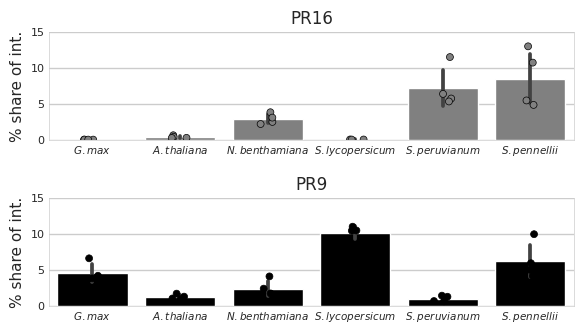

In [259]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 3.5))

dims = (2, 1)

pr16 = plt.subplot2grid(dims, (0, 0))
pr9 = plt.subplot2grid(dims, (1, 0))

axes = [pr16, pr9]

annotate_axes(axes)

### Define some arrays ###

ros_dfs = gm_pareto_ros_comp.append([at_pareto_ros_comp, sl_pareto_ros_comp, sr_pareto_ros_comp, sn_pareto_ros_comp, nb_pareto_ros_comp])
ros_dfs = ros_dfs[ros_dfs.fraction != 0]

species = ['G.max', 'A.thaliana', 'N.benthamiana', 'S.lycopersicum', 'S.peruvianum', 'S.pennellii']
spe_labels = []
[spe_labels.append("$\it{}$".format(x)) for x in species]
spe = ['gm', 'at', 'nb', 'sl', 'sr', 'sn']


pareto_colours = {'Other':'white',
                 'FAS':'gainsboro',
                 'PR14':'gainsboro',
                 'PR9':'black',
                 'PR1':'blue',
                 'PR5':'aqua',
                 'PR2':'darkgreen',
                 'PR3':'limegreen',
                 'PR8':'olivedrab',
                 'PR16':'gray',
                 'Other GH':'springgreen',
                 'Aspartyl peptidase':'pink',
                 'Metallopeptidase':'magenta',
                 'PLCP':'gold',
                 'PR7 (SBT)':'red',
                 'S8 (SBT)':'tomato',
                 'S10 (SCPL)':'lightsalmon',
                 'Protease inh':'brown'}


# Plot ROS

for axe, prs in zip(axes, ['PR16', 'PR9']):

    sns.barplot(data=ros_dfs[ros_dfs.category == prs], x='species', y='fraction', hue='category', order=spe, ci='sd', palette=pareto_colours, ax=axe)
    sns.stripplot(data=ros_dfs[ros_dfs.category == prs], x='species', y='fraction', hue='category', order=spe, dodge=True, edgecolor='black', linewidth=0.5, palette=pareto_colours, ax=axe)

    axe.set_ylim(0, 15)
    axe.legend().set_visible(False)

    axe.set_title(prs)
    axe.set_xticklabels(spe_labels, fontsize=7.5)
    axe.set_ylabel('% share of int.', fontsize=11)
    axe.set_xlabel('')

        
#    handles, labels = axe.get_legend_handles_labels()
#    axe.legend(handles, labels, loc=4, prop={"size":6}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure_pareto_ISs_split_jupyter_ROS.svg', transparent=True)
plt.show()

/home/felix/.local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


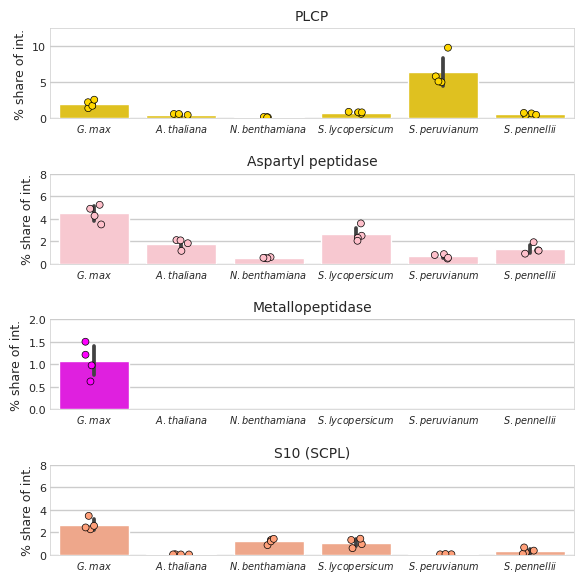

In [266]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 6))

dims = (4, 1)

plcp = plt.subplot2grid(dims, (0, 0))
aspp = plt.subplot2grid(dims, (1, 0))
meta = plt.subplot2grid(dims, (2, 0))
scpl = plt.subplot2grid(dims, (3, 0))

axes = [plcp, aspp, meta, scpl]

annotate_axes(axes)

### Define some arrays ###
                  
pep_dfs = gm_pareto_prot_comp.append([at_pareto_prot_comp, sl_pareto_prot_comp, sr_pareto_prot_comp, sn_pareto_prot_comp, nb_pareto_prot_comp])
pep_dfs = pep_dfs[pep_dfs.fraction != 0]
                  
species = ['G.max', 'A.thaliana', 'N.benthamiana', 'S.lycopersicum', 'S.peruvianum', 'S.pennellii']
spe_labels = []
[spe_labels.append("$\it{}$".format(x)) for x in species]
spe = ['gm', 'at', 'nb', 'sl', 'sr', 'sn']
peps = ['PLCP', 'Aspartyl peptidase', 'Metallopeptidase', 'S10 (SCPL)']

ylims = [(0, 12.5), (0, 8), (0, 2), (0, 8)]

# Plot Proteases

for axe, ylim, prot in zip(axes, ylims, peps):

    sns.barplot(data=pep_dfs[pep_dfs.category == prot], x='species', y='fraction', hue='category', order=spe, ci='sd', palette=pareto_colours, ax=axe)
    sns.stripplot(data=pep_dfs[pep_dfs.category == prot], x='species', y='fraction', hue='category', order=spe, dodge=True, edgecolor='black', linewidth=0.5, palette=pareto_colours, ax=axe)

    axe.set_xticklabels(spe_labels, fontsize=7)
    axe.set_ylabel('% share of int.', fontsize=9)
    axe.set_ylim(ylim)
    axe.set_xlabel('')
    axe.set_title(prot, fontsize=10)
    axe.legend().set_visible(False)
    

      
plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure_pareto_ISs_proteases_report_split.svg', transparent=True)
plt.show()

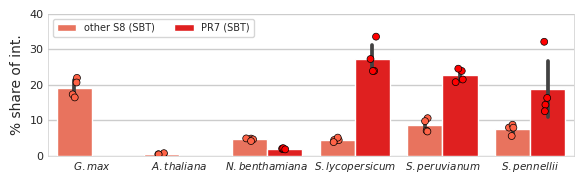

In [273]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=1)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.0, 2))

dims = (1, 1)

pep = plt.subplot2grid(dims, (0, 0))

axes = [pep]

annotate_axes(axes)

### Define some arrays ###
                  
pep_dfs = gm_pareto_prot_comp.append([at_pareto_prot_comp, sl_pareto_prot_comp, sr_pareto_prot_comp, sn_pareto_prot_comp, nb_pareto_prot_comp])
pep_dfs = pep_dfs[pep_dfs.fraction != 0]
        
spe = ['gm', 'at', 'nb', 'sl', 'sr', 'sn']
species = ['G.max', 'A.thaliana', 'N.benthamiana', 'S.lycopersicum', 'S.peruvianum', 'S.pennellii']
spe_labels = []
[spe_labels.append("$\it{}$".format(x)) for x in species]

pep_order = ['S8 (SBT)', 'PR7 (SBT)']
pep_labels = ['other S8 (SBT)', 'PR7 (SBT)']


pareto_colours = {'Other':'white',
                 'FAS':'gainsboro',
                 'PR14':'gainsboro',
                 'PR9':'black',
                 'PR1':'blue',
                 'PR5':'aqua',
                 'PR2':'darkgreen',
                 'PR3':'limegreen',
                 'PR8':'olivedrab',
                 'PR16':'gray',
                 'Other GH':'springgreen',
                 'Aspartyl peptidase':'pink',
                 'Metallopeptidase':'magenta',
                 'PLCP':'gold',
                 'PR7 (SBT)':'red',
                 'S8 (SBT)':'tomato',
                 'S10 (SCPL)':'lightsalmon',
                 'Protease inh':'brown'}


# Plot Proteases

sns.barplot(data=pep_dfs, x='species', y='fraction', hue='category', order=spe, hue_order=pep_order, ci='sd', palette=pareto_colours, ax=pep)
sns.stripplot(data=pep_dfs, x='species', y='fraction', hue='category', order=spe, hue_order=pep_order, dodge=True, edgecolor='black', linewidth=0.5, palette=pareto_colours, ax=pep)

pep.set_ylim(0, 40)

handles, labels = pep.get_legend_handles_labels()
labels = [x.replace('peptidase', 'pept.') for x in labels]
pep.legend(handles[2:], pep_labels, ncol=2, loc=2, prop={"size":7}, markerscale=0.5)

# Axes labels

for ax in axes:
    ax.set_xticklabels(spe_labels, fontsize=7.5)
    ax.set_ylabel('% share of int.', fontsize=10)
    ax.set_xlabel('')

        
#legend = nb.legend()
#handles = legend.legendHandles

#handles, labels = gm.get_legend_handles_labels()
#gm.legend(handles, labels, loc=4, prop={"size":6}, markerscale=0.5)

plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure11_report.png', dpi=200, transparent=True)
plt.show()

### Analyse Intensities per protein

In [274]:
sbts = pd.read_csv('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/sbt_tree/sbts_names.ids', sep='\t', names=['ids'])['ids'].to_numpy()

In [275]:
sl_index = ms.linearise_ms(sl_raw_sub).index
sr_index = ms.linearise_ms(speru_raw_sub).index
sn_index = ms.linearise_ms(spen_raw_sub).index
nb_index = ms.linearise_ms(nb_raw_sub).index
gm_index = ms.linearise_ms(gm_raw_sub).index
at_index = ms.linearise_ms(at_raw_sub).index

In [276]:
sl_log2_stats = ms.fdr_correction(ms.two_sided_ogs_t_test(sl_log2_sub), 'p_value')
sr_log2_stats = ms.fdr_correction(ms.two_sided_ogs_t_test(speru_log2_sub), 'p_value')
sn_log2_stats = ms.fdr_correction(ms.two_sided_ogs_t_test(spen_log2_sub), 'p_value')
gm_log2_stats = ms.fdr_correction(ms.two_sided_ogs_t_test(gm_log2_sub), 'p_value')
at_log2_stats = ms.fdr_correction(ms.two_sided_ogs_t_test(at_log2_sub), 'p_value')
nb_log2_stats = ms.fdr_correction(ms.two_sided_ogs_t_test(nb_log2_sub), 'p_value')

In [378]:
sl_log2_stats = ms.two_sided_ogs_t_test(sl_log2_sub)
sl_log2_stats_comp = ms.fdr_correction(sl_log2_stats[(sl_log2_stats.log2FC < -0.9) | (sl_log2_stats.log2FC > 0.9)], 'p_value')

sr_log2_stats = ms.two_sided_ogs_t_test(speru_log2_sub)
sr_log2_stats_comp = ms.fdr_correction(sr_log2_stats[(sr_log2_stats.log2FC < -0.9) | (sr_log2_stats.log2FC > 0.9)], 'p_value')

sn_log2_stats = ms.two_sided_ogs_t_test(spen_log2_sub)
sn_log2_stats_comp = ms.fdr_correction(sn_log2_stats[(sn_log2_stats.log2FC < -0.9) | (sn_log2_stats.log2FC > 0.9)], 'p_value')

gm_log2_stats = ms.two_sided_ogs_t_test(gm_log2_sub)
gm_log2_stats_comp = ms.fdr_correction(gm_log2_stats[(gm_log2_stats.log2FC < -0.9) | (gm_log2_stats.log2FC > 0.9)], 'p_value')

at_log2_stats = ms.two_sided_ogs_t_test(at_log2_sub)
at_log2_stats_comp = ms.fdr_correction(at_log2_stats[(at_log2_stats.log2FC < -0.9) | (at_log2_stats.log2FC > 0.9)], 'p_value')

nb_log2_stats = ms.two_sided_ogs_t_test(nb_log2_sub)
nb_log2_stats_comp = ms.fdr_correction(nb_log2_stats[(nb_log2_stats.log2FC < -0.9) | (nb_log2_stats.log2FC > 0.9)], 'p_value')

In [383]:
cols = ['log2FC']
sbt_log2_stats = sl_log2_stats[cols].append([sr_log2_stats[cols], sn_log2_stats[cols], gm_log2_stats[cols], at_log2_stats[cols], nb_log2_stats[cols]])
sbt_log2_stats = ms.linearise_ms(sbt_log2_stats)

cols = ['log2FC', 'fdr_bh_correction_p_value']
sbt_log2_stats_comp = sl_log2_stats_comp[cols].append([sr_log2_stats_comp[cols], sn_log2_stats_comp[cols], gm_log2_stats_comp[cols], at_log2_stats_comp[cols], nb_log2_stats_comp[cols]])
sbt_log2_stats_comp = ms.linearise_ms(sbt_log2_stats_comp)

In [280]:
dfs = [sl_log2_stats, sr_log2_stats, sn_log2_stats, gm_log2_stats, at_log2_stats, nb_log2_stats]

up = []
do = []

for df in dfs:
    tmp_up = df[(df.fdr_bh_correction_p_value == True) & (df.log2FC > 0.9)]
    tmp_do = df[(df.fdr_bh_correction_p_value == True) & (df.log2FC < -0.9)]

    for prots in tmp_up.index:
        prots = prots.split(';')
        prots = [x.replace(' ', '') for x in prots]
        for prot in prots:
            up.append(prot)
            
    for prots in tmp_do.index:
        prots = prots.split(';')
        prots = [x.replace(' ', '') for x in prots]
        for prot in prots:
            do.append(prot)

with open('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/sbt_tree/induced_sbts.txt', 'w') as f:
    for sbt in sbts:
        if sbt in up:
            f.write("{},1\n".format(sbt))
            
            if sbt in do:
                print('ERROR')
                
        elif sbt in do:
            f.write("{},0\n".format(sbt))
            
            if sbt in up:
                print('ERROR')
                
        else:
            f.write("{},-1\n".format(sbt))

In [286]:
def id_boxplot(df, change_names_array):
    new = []
    new_reps = []
    
    tmp = ms.linearise_ms(df[df.predicted_secretion == True])
    tmp = tmp.rename(columns=change_names_array)
    tmp.drop(columns=['predicted_secretion'], inplace=True)
    
    for row in tmp.index:
        tmp_mean = []
        for col in tmp.columns:
            if 'B' in col:
                tot = np.sum(tmp[col])
                share = 100*tmp.loc[row, col]/tot
                tmp_mean.append(share)
                
        if tmp_mean.count(0) < 3:
            tmp_mean = [i for i in tmp_mean if i != 0]
                
        if row in sbts:
            new.append([row, np.min(tmp_mean), np.quantile(tmp_mean, 0.25), np.median(tmp_mean), np.quantile(tmp_mean, 0.75), np.max(tmp_mean)])
#    tmp = tmp[tmp.index.isin(sbts)]
    new = pd.DataFrame(new, columns=['name', 'min', 'first_quant', 'median', 'third_quantile', 'max'])
    new.index = new['name']
    new.drop(columns=['name'], inplace=True)
    return(new)

In [288]:
change_names = {'LFQ_intensity_AF_W_11':'W1', 'LFQ_intensity_AF_W_12':'W2', 'LFQ_intensity_AF_W_13':'W3', 'LFQ_intensity_AF_W_14':'W4', 'LFQ_intensity_AF_B_16':'B1', 'LFQ_intensity_AF_B_17':'B2', 'LFQ_intensity_AF_B_18':'B3', 'LFQ_intensity_AF_B_19':'B4'}
sl_sbt_boxp = id_boxplot(sl_raw_sub, change_names)
spen_sbt_boxp = id_boxplot(spen_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_01':'W1', 'LFQ_intensity_AF_W_02':'W2', 'LFQ_intensity_AF_W_03':'W3', 'LFQ_intensity_AF_W_04':'W4', 'LFQ_intensity_AF_B_06':'B1', 'LFQ_intensity_AF_B_07':'B2', 'LFQ_intensity_AF_B_08':'B3', 'LFQ_intensity_AF_B_09':'B4'}
speru_sbt_boxp = id_boxplot(speru_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_21':'W1', 'LFQ_intensity_AF_W_22':'W2', 'LFQ_intensity_AF_W_23':'W3', 'LFQ_intensity_AF_W_24':'W4', 'LFQ_intensity_AF_B_26':'B1', 'LFQ_intensity_AF_B_27':'B2', 'LFQ_intensity_AF_B_28':'B3', 'LFQ_intensity_AF_B_29':'B4'}
nb_sbt_boxp = id_boxplot(nb_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_31':'W1', 'LFQ_intensity_AF_W_32':'W2', 'LFQ_intensity_AF_W_33':'W3', 'LFQ_intensity_AF_W_34':'W4', 'LFQ_intensity_AF_B_36':'B1', 'LFQ_intensity_AF_B_37':'B2', 'LFQ_intensity_AF_B_38':'B3', 'LFQ_intensity_AF_B_39':'B4'}
gm_sbt_boxp = id_boxplot(gm_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_1':'W1', 'LFQ_intensity_AF_W_2':'W2', 'LFQ_intensity_AF_W_4':'W4', 'LFQ_intensity_AF_B_6':'B1', 'LFQ_intensity_AF_B_7':'B2', 'LFQ_intensity_AF_B_8':'B3', 'LFQ_intensity_AF_B_9':'B4'}
at_sbt_boxp = id_boxplot(at_raw_sub, change_names)

sbt_boxp = pd.concat([sl_sbt_boxp, speru_sbt_boxp, spen_sbt_boxp, nb_sbt_boxp, gm_sbt_boxp, at_sbt_boxp])

In [289]:
with open('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/sbt_tree/itol/sbt_boxp.csv', 'w') as f:
    for i in sbt_boxp.index:
        vals = sbt_boxp.loc[i]
        f.write("{},{},{},{},{},{}\n".format(i, vals[0], vals[1], vals[2], vals[3], vals[4]))

In [290]:
def id_shares(df, change_names_array):
    new = []
    new_reps = []
    
    tmp = df[df.predicted_secretion == True]
    tmp = tmp.rename(columns=change_names_array)
    tmp.drop(columns=['predicted_secretion'], inplace=True)
    
    for row in tmp.index:
        prots = row.split(';')
        prots = [x.replace(' ', '') for x in prots]
        
        tmp_mean = []
        for col in tmp.columns:
            if 'B' in col:
                tot = np.sum(tmp[col])
                share = 100*tmp.loc[row, col]/tot
                tmp_mean.append(share)
                
        if tmp_mean.count(0) < 3:
            tmp_mean = [i for i in tmp_mean if i != 0]
        
        for prot in prots:
            if prot in sbts:
                new.append([prot, np.mean(tmp_mean)])

#    tmp = tmp[tmp.index.isin(sbts)]
    new = pd.DataFrame(new, columns=['name', 'fraction'])
    new.index = new['name']
    new.drop(columns=['name'], inplace=True)
    
    return(new)

In [291]:
change_names = {'LFQ_intensity_AF_W_11':'W1', 'LFQ_intensity_AF_W_12':'W2', 'LFQ_intensity_AF_W_13':'W3', 'LFQ_intensity_AF_W_14':'W4', 'LFQ_intensity_AF_B_16':'B1', 'LFQ_intensity_AF_B_17':'B2', 'LFQ_intensity_AF_B_18':'B3', 'LFQ_intensity_AF_B_19':'B4'}
sl_sbt_shares = id_shares(sl_raw_sub, change_names)
spen_sbt_shares = id_shares(spen_raw_sub, change_names)


change_names = {'LFQ_intensity_AF_W_01':'W1', 'LFQ_intensity_AF_W_02':'W2', 'LFQ_intensity_AF_W_03':'W3', 'LFQ_intensity_AF_W_04':'W4', 'LFQ_intensity_AF_B_06':'B1', 'LFQ_intensity_AF_B_07':'B2', 'LFQ_intensity_AF_B_08':'B3', 'LFQ_intensity_AF_B_09':'B4'}
speru_sbt_shares = id_shares(speru_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_21':'W1', 'LFQ_intensity_AF_W_22':'W2', 'LFQ_intensity_AF_W_23':'W3', 'LFQ_intensity_AF_W_24':'W4', 'LFQ_intensity_AF_B_26':'B1', 'LFQ_intensity_AF_B_27':'B2', 'LFQ_intensity_AF_B_28':'B3', 'LFQ_intensity_AF_B_29':'B4'}
nb_sbt_shares = id_shares(nb_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_31':'W1', 'LFQ_intensity_AF_W_32':'W2', 'LFQ_intensity_AF_W_33':'W3', 'LFQ_intensity_AF_W_34':'W4', 'LFQ_intensity_AF_B_36':'B1', 'LFQ_intensity_AF_B_37':'B2', 'LFQ_intensity_AF_B_38':'B3', 'LFQ_intensity_AF_B_39':'B4'}
gm_sbt_shares = id_shares(gm_raw_sub, change_names)

change_names = {'LFQ_intensity_AF_W_1':'W1', 'LFQ_intensity_AF_W_2':'W2', 'LFQ_intensity_AF_W_4':'W4', 'LFQ_intensity_AF_B_6':'B1', 'LFQ_intensity_AF_B_7':'B2', 'LFQ_intensity_AF_B_8':'B3', 'LFQ_intensity_AF_B_9':'B4'}
at_sbt_shares = id_shares(at_raw_sub, change_names)

sbt_shares = pd.concat([sl_sbt_shares, speru_sbt_shares, spen_sbt_shares, nb_sbt_shares, gm_sbt_shares, at_sbt_shares])

### Backup order of the SBT proteins in the tree

In [328]:
sbt_heat_order = {'NP_001237585.2':'gm',
                  'XP_006596615.1':'gm',
                  'XP_006595881.1':'gm',
                  'XP_003544157.1':'gm',
                  'NP_001322709.1':'at',
                  'NP_001031070.1':'at',
                  'NP_564107.1':'at',
                  'XP_003523384.1':'gm',
                  'NbD038072.1':'nb',
                  'NbD021558.1':'nb',
                  'Solyc04g081810.4.1':'sl',
                  'XP_003548151.1':'gm',
                  'NbD000355.1':'nb',
                  'Solyc04g078740.2.1':'sl',
                  'NbD027134.1':'sl',
                  'XP_015061833.1':'sn',
                  'Solyc12g088760.1.1':'sl',
                  'SperuGCA_003876_elongation_putative_pseudo':'sr',
                  'SperuGCA_035150':'sr',
                  'NbD051731.1':'nb',
                  'Solyc08g007670.1.1':'sl',
                  'SperuGCA_045154':'sr',
                  'SperuGCA_006701':'sr',
                  'NbD047540.1':'nb',
                  'NbD038132.1':'nb',
                  'Solyc08g079850.3.1':'sl',
                  'SperuGCA_052101_elongation_putative_pseudo':'sr',
                  'Solyc08g079840.2.1':'sr',
                  'XP_015085423.1':'sn',
                  'Solyc08g079860.2.1':'sl',
                  'SperuGCA_000634':'sr',
                  'XP_015085422.1':'sn',
                  'Solyc08g079870.3.1':'sl',
                  'SperuGCA_052100':'sr',
                  'Solyc08g079880.2.1':'sl',
                  'SperuGCA_088264':'sr',
                  'Solyc08g079900.3.1':'sr',
                  'XP_027774880.1':'sn',
                  'SperuGCA_105301':'sr',
                  'SperuGCA_034651':'sr',
                  'Solyc08g079890.2.1':'sl',
                  'NP_566473.2':'at',
                  'XP_006583162.2':'gm',
                  'XP_003547763.1':'gm',
                  'XP_014624438.1':'gm',
                  'NbD027078.1':'nb',
                  'NbD027079.1':'nb',
                  'NbD007252.1':'nb',
                  'Solyc06g062950.1.1':'sl',
                  'SperuGCA_035355':'sr',
                  'XP_015079102.1':'sn',
                  'XP_003523991.1':'gm',
                  'XP_003525925.1':'gm',
                  'NbE03059263.1':'nb',
                  'XP_015074260.1':'sn',
                  'Solyc04g078110.1.1':'sl',
                  'NP_569048.1':'at',
                  'XP_003550022.1':'gm',
                  'XP_006579931.1':'gm',
                  'XP_006579932.1':'gm',
                  'XP_006579930.1':'gm',
                  'NbD006086.1':'nb',
                  'Solyc02g092670.1.1':'sl',
                  'SperuGCA_053216':'sr',
                  'XP_015066057.1':'sn',
                  'NbE03058205.1':'nb',
                  'NbD025685.1':'nb',
                  'XP_015069820.1':'sn',
                  'SperuGCA_044859':'sr',
                  'Solyc03g044150.4.1':'sl'}

In [375]:
for i in sbt_log2_stats.index:
    if 'Solyc02g092670.1.1' in i:
        print(i)
        
    elif i in 'Solyc02g092670.1.1':
        print(i)

In [410]:
sbt_shares.loc['Solyc08g079870.3.1']

fraction    5.841835
Name: Solyc08g079870.3.1, dtype: float64

In [409]:
sbt_shares.head()

,fraction
name,
Solyc02g092670.1.1,0.734756
Solyc03g044150.4.1,1.410465
Solyc04g078110.1.1,0.130514
Solyc04g078740.2.1,0.523406
Solyc04g081810.4.1,0.014503


In [405]:
words =['_elongation_putative_pseudo']
sbt_heat_share = []
sbt_heat_log2f = []

for prot in sbt_heat_order:
    
#    for word in words:
#        if word in prot:
#            prot = prot.replace(word, '')
#            print(prot)
    val = sbt_shares.loc[prot].to_numpy()[0]
    log = sbt_log2_stats.loc[prot].to_numpy()[0]
    spec = sbt_heat_order[prot]
    
    if spec == 'gm':
        sbt_heat_share.append([prot, val, None, None, None, None, None])
        sbt_heat_log2f.append([prot, log, None, None, None, None, None])
    
    elif spec == 'at':
        sbt_heat_share.append([prot, None, val, None, None, None, None])
        sbt_heat_log2f.append([prot, None, log, None, None, None, None])
        
    elif spec == 'nb':
        sbt_heat_share.append([prot, None, None, val, None, None, None])
        sbt_heat_log2f.append([prot, None, None, log, None, None, None])

    elif spec == 'sl':
        sbt_heat_share.append([prot, None, None, None, val, None, None])
        sbt_heat_log2f.append([prot, None, None, None, log, None, None])
        
    elif spec == 'sr':
        sbt_heat_share.append([prot, None, None, None, None, val, None])
        sbt_heat_log2f.append([prot, None, None, None, None, log, None])
        
    elif spec == 'sn':
        sbt_heat_share.append([prot, None, None, None, None, None, val])
        sbt_heat_log2f.append([prot, None, None, None, None, None, log])
    
sbt_heat_share = pd.DataFrame(sbt_heat_share, columns=['protein_id', 'gm', 'at', 'nb', 'sl', 'sr', 'sn'])
sbt_heat_log2f = pd.DataFrame(sbt_heat_log2f, columns=['protein_id', 'gm', 'at', 'nb', 'sl', 'sr', 'sn'])

In [406]:
sbt_heat_log2f.set_index(['protein_id'], inplace=True)
sbt_heat_share.set_index(['protein_id'], inplace=True)

In [389]:
#sbt_heat_log2f.drop(columns=['protein_id'], inplace=True)
#sbt_heat_share.drop(columns=['protein_id'], inplace=True)

In [414]:
np.log(sbt_heat_share)

,gm,at,nb,sl,sr,sn
protein_id,,,,,,
NP_001237585.2,-1.848145,NaN,NaN,NaN,NaN,NaN
XP_006596615.1,-0.145108,NaN,NaN,NaN,NaN,NaN
XP_006595881.1,2.087135,NaN,NaN,NaN,NaN,NaN
XP_003544157.1,2.087135,NaN,NaN,NaN,NaN,NaN
NP_001322709.1,NaN,-6.300818,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
NbE03058205.1,NaN,NaN,-2.868425,NaN,NaN,NaN
NbD025685.1,NaN,NaN,-1.972139,NaN,NaN,NaN
XP_015069820.1,NaN,NaN,NaN,NaN,NaN,-1.390371


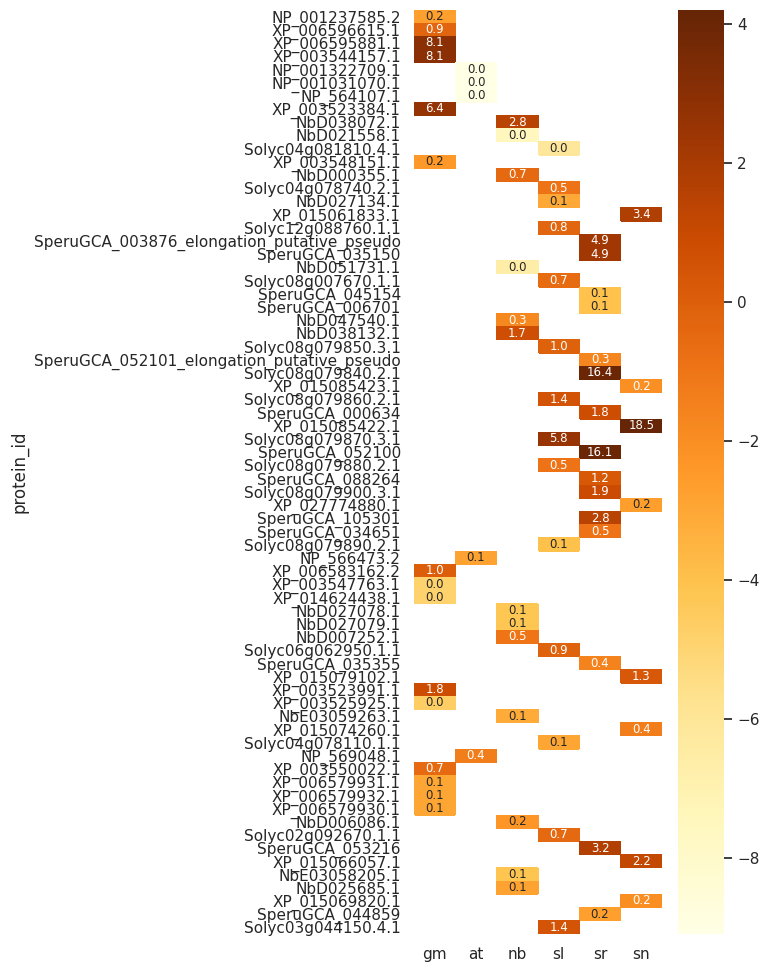

In [428]:
plt.figure(figsize=(4, 12))

sns.heatmap(np.log2(sbt_heat_share), annot=sbt_heat_share, mask=sbt_heat_log2f.isnull(), cmap='YlOrBr', annot_kws={"size": 8.5}, fmt='.1f', cbar=True, yticklabels=True)

#plt.savefig('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/corrections/Figure10_heatmap_jupyter.svg', transparent=True)
plt.show()

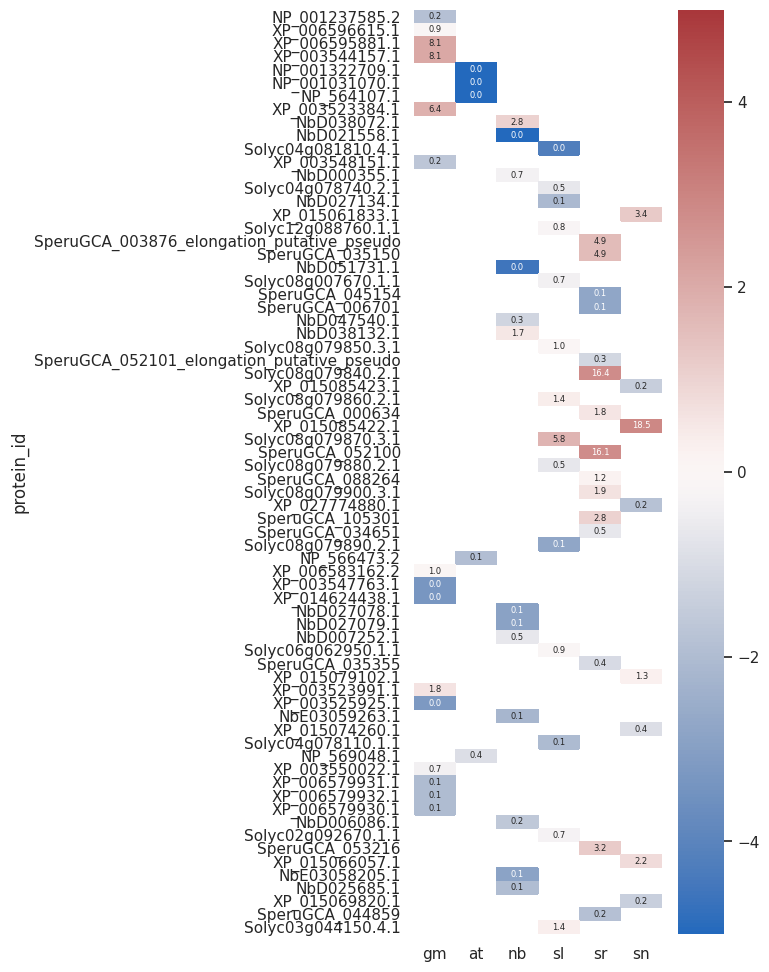

In [415]:
plt.figure(figsize=(4, 12))

sns.heatmap(sbt_heat_log2f, annot=sbt_heat_share, mask=sbt_heat_log2f.isnull(), annot_kws={"size": 6}, fmt='.1f', cmap='vlag', cbar=True, vmin=-5, vmax=5, yticklabels=True)

plt.show()

In [293]:
with open('/home/felix/thesis/chapter3_broader_IS_context/Results/2_species_MS/orthogroups/sbt_tree/itol/sbt_shares.csv', 'w') as f:
    for i in sbt_shares.index:
        f.write("{},{}\n".format(i, sbt_shares.loc[i, 'fraction']))

In [294]:
def combine_s8(df_pareto):
    new = df_pareto.copy()
    spec = np.unique(df_pareto['species'])[0]
    for rep in np.unique(df_pareto['replicate']):
        s8_tot = np.sum(df_pareto[(df_pareto.replicate == rep) & (df_pareto.category.isin(['PR7', 'S8', 'S10']))].fraction.to_numpy())
        new = new.append(pd.DataFrame([[spec, rep, 'serine protease', s8_tot]], columns=['species', 'replicate', 'category', 'fraction']), ignore_index=True)
       
    return(new)

In [295]:
sl_pareto_prot_comp = combine_s8(sl_pareto_prot_comp)
sr_pareto_prot_comp = combine_s8(sr_pareto_prot_comp)
sn_pareto_prot_comp = combine_s8(sn_pareto_prot_comp)
nb_pareto_prot_comp = combine_s8(nb_pareto_prot_comp)
gm_pareto_prot_comp = combine_s8(gm_pareto_prot_comp)
at_pareto_prot_comp = combine_s8(at_pareto_prot_comp)

In [296]:
np.mean(sl_pareto_sbt_comp[sl_pareto_sbt_comp.category == 'PR7'].fraction)

nan

In [297]:
np.mean(sr_pareto_sbt_comp[sr_pareto_sbt_comp.category == 'PR7'].fraction)

nan

In [298]:
np.mean(sn_pareto_sbt_comp[sn_pareto_sbt_comp.category == 'PR7'].fraction)

nan

In [ ]:
sl_log2_sub.loc['Solyc04g078740.2.1']

In [ ]:
at_ogs_log2_comp.loc['OG0005405']

In [ ]:
dfs = [gm_pareto, at_pareto, sl_pareto, sr_pareto, sn_pareto, nb_pareto]
spe = ['gm', 'at', 'sl', 'speru', 'spen', 'nb']

fig, axes = plt.subplots(1, 6, figsize=(10, 5))

for counter, df in enumerate(dfs):

    sns.histplot(data=df, x='species', weights='fraction', hue='test', multiple='stack', legend=False, edgecolor='black', linewidth=0, shrink=0.8, ax=axes[counter])

handles, labels = axes[counter].get_legend_handles_labels()
print(handles, labels)
axes[counter].legend(handles, labels, loc=4, prop={"size":6}, markerscale=0.5)

legend = axes.get_legend()
handles = legend.legendHandles
labels = legend.legendLabels
legend.remove()
ax1.legend(handles, labels, title='Stat.ind.')

plt.show()


In [ ]:
np.unique(imsec.category)

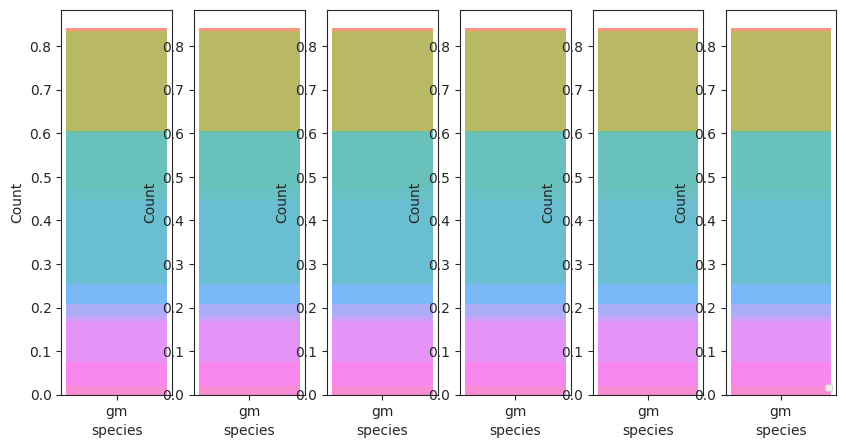

In [153]:
fig, axes = plt.subplots(1, 6, figsize=(10, 5))

for counter, spec in enumerate(species):

    sns.histplot(data=gm_pareto, x='species', weights='fraction', hue='test', multiple='stack', legend=False, edgecolor='black', linewidth=0, shrink=0.8, ax=axes[counter])

handles, labels = axes[counter].get_legend_handles_labels()
axes[counter].legend(handles, labels, loc=4, prop={"size":6}, markerscale=0.5)

plt.show()

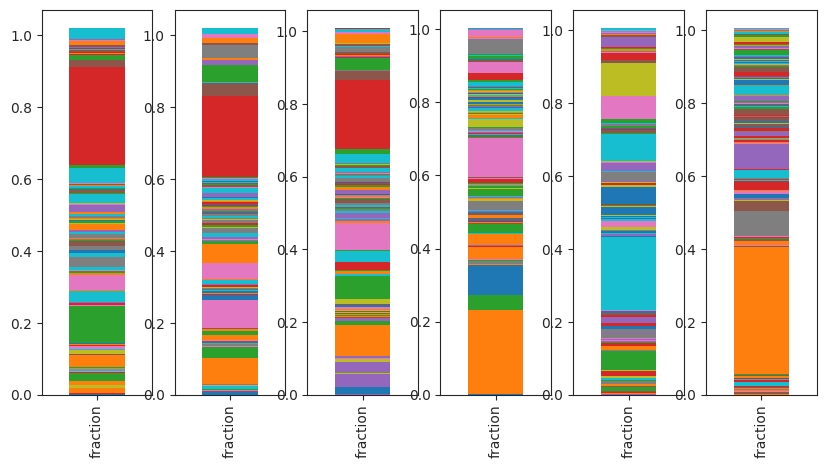

In [136]:
dfs = [sl_imsec_show, sr_imsec_show, sn_imsec_show, nb_imsec_show, gm_imsec_show, at_imsec_show]

fig, axes = plt.subplots(1, 6, figsize=(10, 5))

for counter, df in enumerate(dfs):
    df[['fraction']].T.plot(kind='bar', stacked=True, legend=False, linewidth=0, ax=axes[counter])
    

plt.show()

## Changeome clustermap

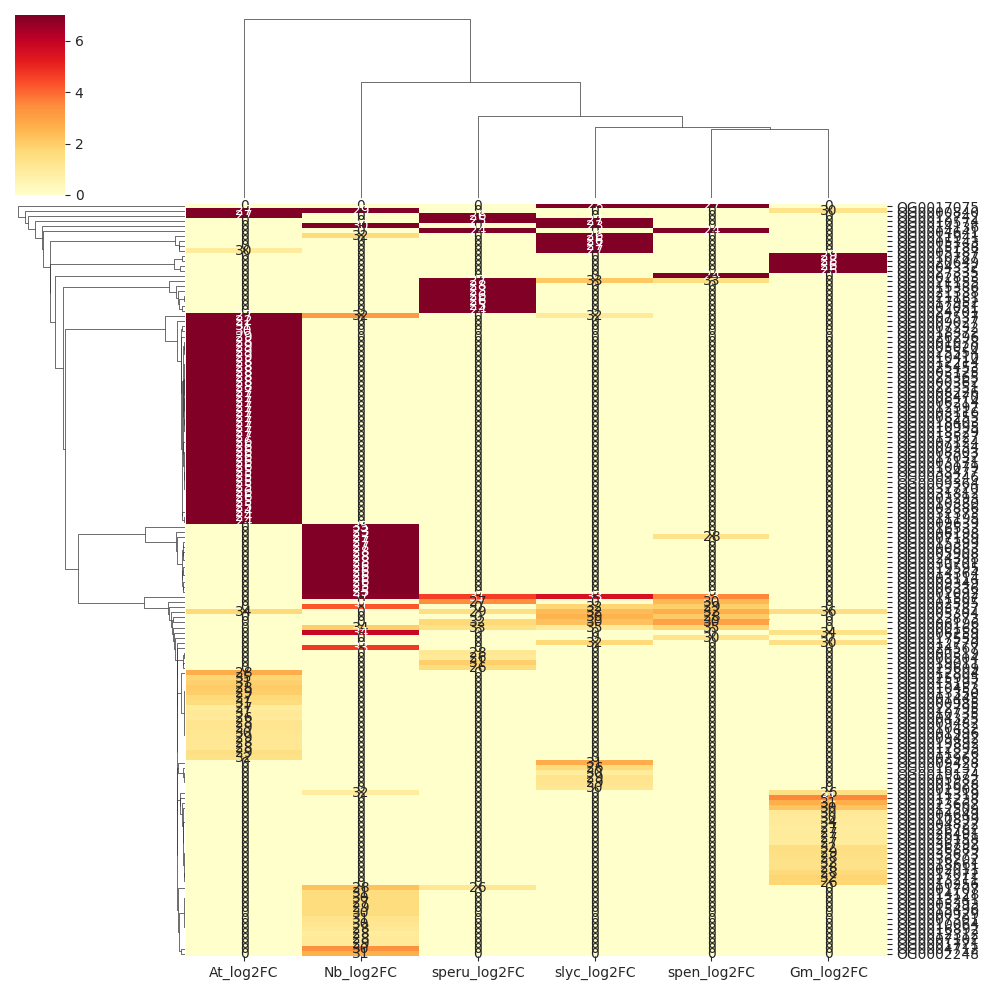

In [465]:
#fig, axes = plt.subplots(1, 1, figsize=(7, 3))

sns.clustermap(data=changeome_lfc, method='single', metric='euclidean', annot=changeome_tot, xticklabels=True, yticklabels=True, cmap='YlOrRd', vmin=0, vmax=7, figsize=(10, 10))

plt.show()

In [ ]:
# make df containing the means of total intensities of each of the three category changing OGs 

species = ['slyc', 'speru', 'spen']
cols_bion = ['Slyc_untransformed_bion_mean', 'Speru_untransformed_bion_mean', 'Spen_untransformed_bion_mean']
cols_mock = ['Slyc_untransformed_water_mean', 'Speru_untransformed_water_mean', 'Spen_untransformed_water_mean']

new = []

for col, spec in zip(cols_bion, species):
    tmp = tomatoes_changeome[[col, 'changeome_category']]
    for cats in np.unique(tmp.changeome_category.to_numpy()):
        val = tmp[tmp.changeome_category == cats][col].to_numpy()
        val = val[~pd.isnull(val)]
        print(cats, val)
        
        break
        val = np.sum(val)
        new.append([spec, cats, val, 'bion'])
        
for col, spec in zip(cols_mock, species):
    break
    tmp = tomatoes_changeome[[col, 'changeome_category']]
    for cats in np.unique(tmp.changeome_category.to_numpy()):
        val = tmp[tmp.changeome_category == cats][col].to_numpy()
        val = val[~pd.isnull(val)]
        val = np.sum(val)
        new.append([spec, cats, val, 'mock'])
    
tomatoes_changeome_barplot = pd.DataFrame(new, columns=['species', 'changeome_category', 'total_sum_intensities', 'treatment'])

In [42]:
ogs_log2 = sl_ogs_log2.append([speru_ogs_log2, spen_ogs_log2, nb_ogs_log2, gm_ogs_log2, at_ogs_log2]).T

In [43]:
ogs_norm = sl_ogs_norm.append([speru_ogs_norm, spen_ogs_norm, nb_ogs_norm, gm_ogs_norm, at_ogs_norm]).T

In [44]:
changeome_mask = changeome_lfc.copy()


for i in changeome_lfc.index:
    for j in changeome_lfc.columns:
        value = changeome_lfc.loc[i, j]
        if value == 0:
            changeome_mask.loc[i, j] = True
        
        else:
            changeome_mask.loc[i, j] = False
            
        if value > 6:
            changeome_lfc.loc[i, j] = 6
            
#        elif value < -2.5:
#            tomatoes_changeome.drop([i], inplace=True)
#            tomatoes_changeome_mask.drop([i], inplace=True)
#            break
#            tomatoes_changeome.loc[i, j] = -8

/home/felix/.local/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x500 with 0 Axes>

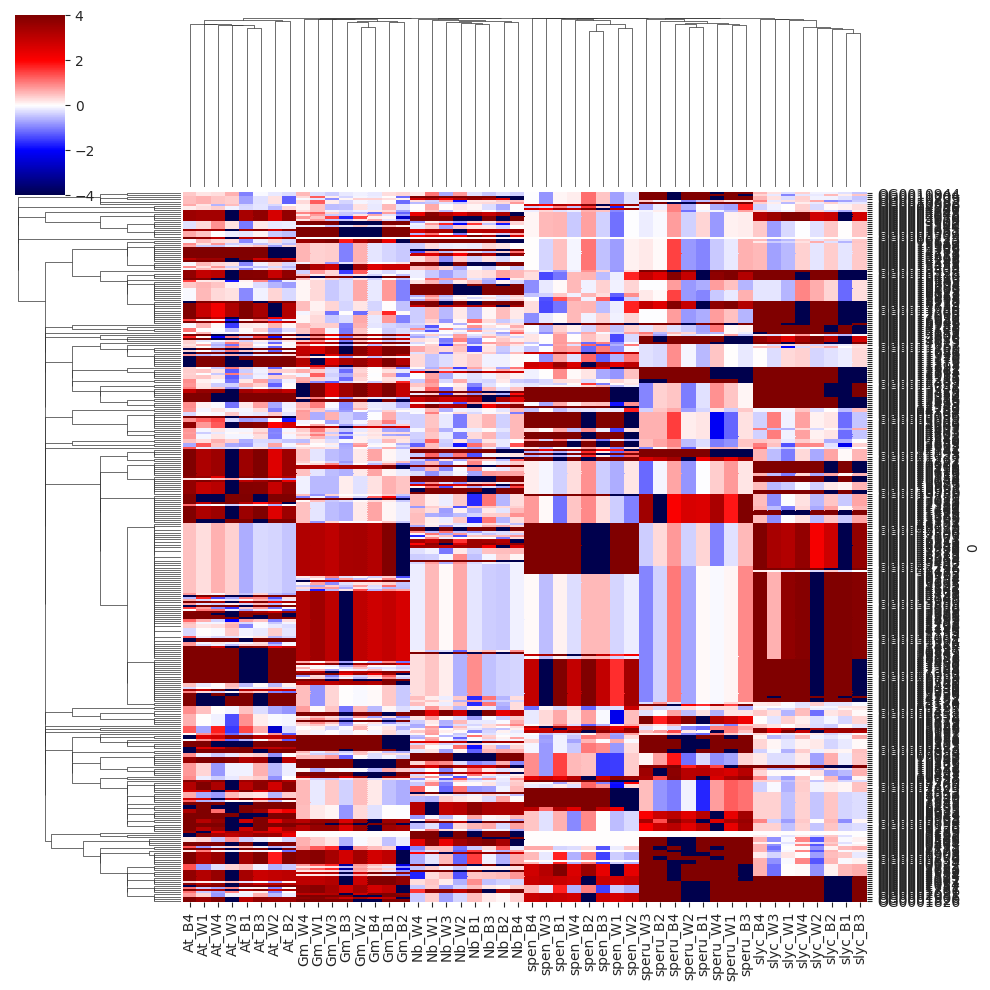

In [64]:
plt.figure(figsize=(10, 5))

sns.clustermap(data=ogs_norm[ogs_norm.index.isin(changeome_lfc.index) == False].replace(0, None), xticklabels=True, yticklabels=True, method='single', metric='jaccard', cmap='seismic', vmin=-4, vmax=4)

plt.show()

In [41]:
# note that OG0008609 is clustered with appearing proteins, when it only has a very high log2fc in reality
appear = ['OG0009032' , 'OG0005896', 'OG0011318', 'OG0015230', 'OG0003255', 'OG0017254', 'OG0010028', 'OG0019347', 'OG0009296', 'OG0011590', 'OG0012402', 'OG0006236', 'OG0017613', 'OG0011522', 'OG0018794', 'OG0023948', 'OG0014115', 'OG0010507', 'OG0018341', 'OG0017896']
#tomatoes_changeome_lfc[tomatoes_changeome_lfc.index.isin(appear)]
pr = ['OG0008609', 'OG0008189', 'OG0000167', 'OG0003427', 'OG0019023', 'OG0022181', 'OG0017783']
other = tomatoes_changeome_lfc[~(tomatoes_changeome_lfc.index.isin(appear))]
other = other[~(other.index.isin(pr))].index

for i in appear:
    tomatoes_changeome.loc[i, 'changeome_category'] = 'appear'

for i in pr:
    tomatoes_changeome.loc[i, 'changeome_category'] = 'pr'

for i in other:
    tomatoes_changeome.loc[i, 'changeome_category'] = 'other'

In [43]:
species = ['slyc', 'speru', 'spen']
cols_bion = ['Slyc_untransformed_bion_mean', 'Speru_untransformed_bion_mean', 'Spen_untransformed_bion_mean']
cols_mock = ['Slyc_untransformed_water_mean', 'Speru_untransformed_water_mean', 'Spen_untransformed_water_mean']

new = []

for col, spec in zip(cols_bion, species):
    tmp = tomatoes_changeome[[col, 'changeome_category']]
    for cats in np.unique(tmp.changeome_category.to_numpy()):
        val = tmp[tmp.changeome_category == cats][col].to_numpy()
        val = val[~pd.isnull(val)]
        val = np.sum(val)
        new.append([spec, cats, val, 'bion'])
        
for col, spec in zip(cols_mock, species):
    tmp = tomatoes_changeome[[col, 'changeome_category']]
    for cats in np.unique(tmp.changeome_category.to_numpy()):
        val = tmp[tmp.changeome_category == cats][col].to_numpy()
        val = val[~pd.isnull(val)]
        val = np.sum(val)
        new.append([spec, cats, val, 'mock'])
    
tomatoes_changeome_barplot = pd.DataFrame(new, columns=['species', 'changeome_category', 'total_sum_intensities', 'treatment'])

In [45]:
1.452691e+10/np.mean(sl_int_plot[spen_int_plot.treatment == 'Mock'].total_LFQ_intensity.to_numpy())

0.09723689817508535

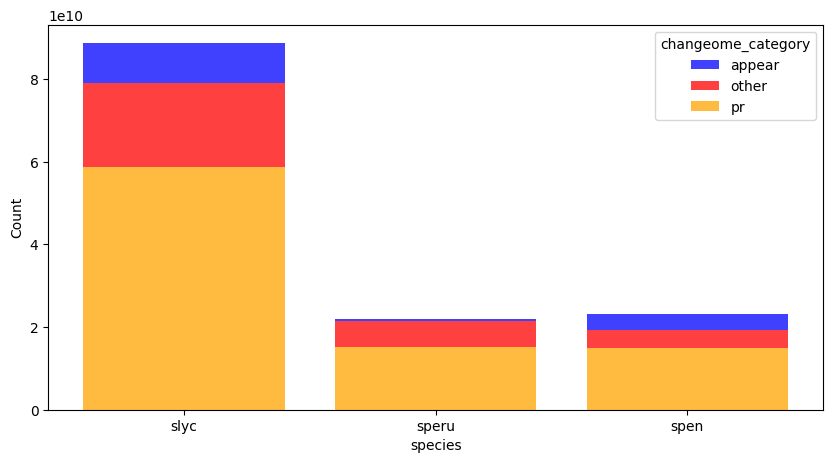

In [46]:
plt.figure(figsize=(10, 5))

sns.histplot(data=tomatoes_changeome_barplot, x='species', weights='total_sum_intensities', hue='changeome_category', multiple='stack', palette=['blue', 'red', 'orange'], edgecolor='black', linewidth=0, shrink=0.8)

#sns.barplot(data=tomatoes_changeome_barplot, x='species', y='total_sum_intensities', hue=)

plt.show()

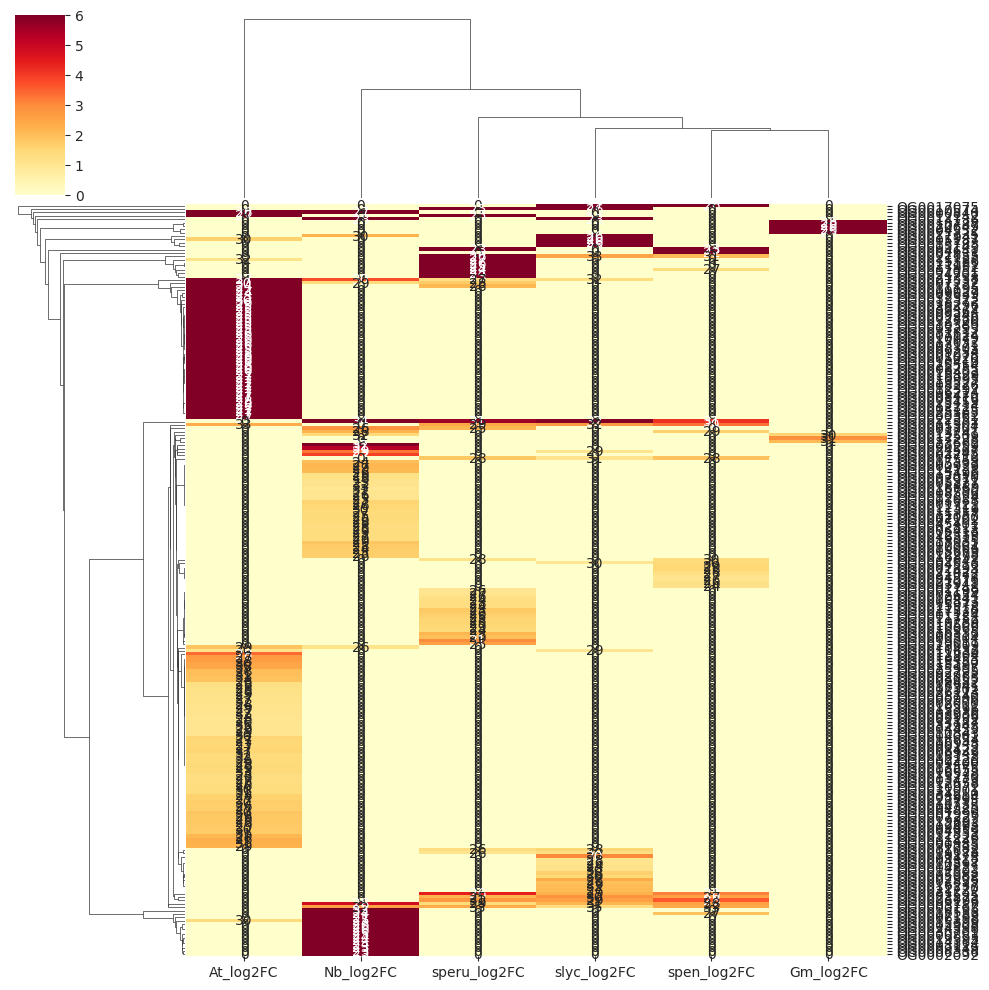

In [157]:
#fig, axes = plt.subplots(1, 1, figsize=(7, 3))

sns.clustermap(data=changeome_lfc, method='single', metric='euclidean', annot=changeome_tot, xticklabels=True, yticklabels=True, cmap='YlOrRd', vmin=0, vmax=6, figsize=(10, 10))

plt.show()

In [50]:
def correlations(df, string):
    new = df.filter(regex=string)
    new = new[new.index.str.contains(string)]
    new = np.unique(new.values.flatten())
    new = new[new != 1]
    
    return(new)

In [51]:
corr = tomatoes_pca.T.corr()


corr_slycM = correlations(corr, 'Slyc_W')
corr_slycB = correlations(corr, 'Slyc_B')

corr_sperM = correlations(corr, 'Speru_W')
corr_sperB = correlations(corr, 'Speru_B')

corr_spenM = correlations(corr, 'Spen_W')
corr_spenB = correlations(corr, 'Spen_B')

In [52]:
corr_slyc = pd.DataFrame([corr_slycM, corr_slycB])
corr_slyc.index = ['Mock', 'Bion']
corr_slyc = corr_slyc.T

new = []
for i in corr_slyc.index:
    new.append([corr_slyc.loc[i, 'Mock'], 'Mock', 'sl'])
    new.append([corr_slyc.loc[i, 'Bion'], 'Bion', 'sl'])
    
corr_slyc = pd.DataFrame(new, columns=['r', 'treatment', 'species'])


corr_sper = pd.DataFrame([corr_sperM, corr_sperB])
corr_sper.index = ['Mock', 'Bion']
corr_sper = corr_sper.T

new = []
for i in corr_sper.index:
    new.append([corr_sper.loc[i, 'Mock'], 'Mock', 'sper'])
    new.append([corr_sper.loc[i, 'Bion'], 'Bion', 'sper'])
    
corr_sper = pd.DataFrame(new, columns=['r', 'treatment', 'species'])

corr_spen = pd.DataFrame([corr_spenM, corr_spenB])
corr_spen.index = ['Mock', 'Bion']
corr_spen = corr_spen.T

new = []
for i in corr_spen.index:
    new.append([corr_spen.loc[i, 'Mock'], 'Mock', 'spen'])
    new.append([corr_spen.loc[i, 'Bion'], 'Bion', 'spen'])
    
corr_spen = pd.DataFrame(new, columns=['r', 'treatment', 'species'])

In [53]:
tomato_corr = corr_slyc.append([corr_sper, corr_spen], ignore_index=True)

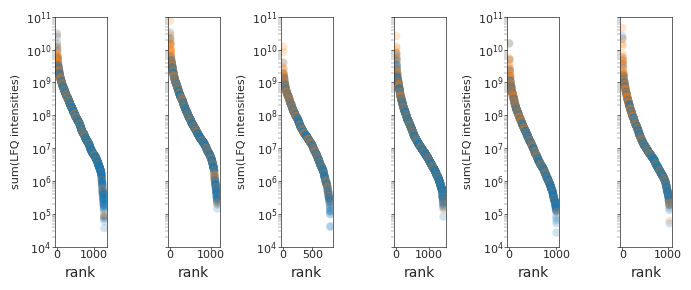

In [38]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(7, 3))

rank_slM = plt.subplot2grid((1, 6), (0, 0))
rank_slB = plt.subplot2grid((1, 6), (0, 1))

rank_prM = plt.subplot2grid((1, 6), (0, 2))
rank_prB = plt.subplot2grid((1, 6), (0, 3))

rank_pnM = plt.subplot2grid((1, 6), (0, 4))
rank_pnB = plt.subplot2grid((1, 6), (0, 5))


axes = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB]
annotate_axes(axes)


### Define some arrays

ranks = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB]



for i in ranks:
    i.set_yscale('log')

sns.scatterplot(data=sl_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_slM)
sns.scatterplot(data=sl_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_slB)
   
sns.scatterplot(data=speru_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_prM)
sns.scatterplot(data=speru_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_prB)

sns.scatterplot(data=spen_rank_plot_mock, x='rank', y='LFQ_mock_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_pnM)
sns.scatterplot(data=spen_rank_plot_bion, x='rank', y='LFQ_bion_total', hue='predicted_secretion', linewidth=0, alpha=0.2, legend=False, ax=rank_pnB)

for counter, i in enumerate(ranks):
    i.set_ylim(10**4, 10**11)
    if counter%2 == 1:  
        i.set_ylabel('')
        i.set_yticklabels('')
        
    else:
        i.set_ylabel('sum(LFQ intensities)', fontsize=8)
        
plt.tight_layout()
plt.show()

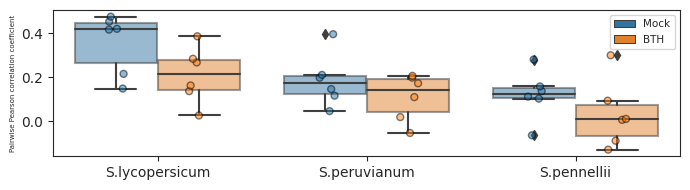

In [50]:
fig, axes = plt.subplots(1, 1, figsize=(7, 2))

#sns.barplot(data=tomato_corr, x='species', y='r', hue='treatment')
sns.boxplot(data=tomato_corr, x='species', y='r', hue='treatment', boxprops={'alpha':0.5}, ax=axes)
sns.stripplot(data=tomato_corr, x='species', y='r', hue='treatment', dodge=True, edgecolor='black', linewidth=1, alpha=0.5, ax=axes)


axes.set_ylabel('Pairwise Pearson correlation coefficient', fontsize=5)
axes.set_xlabel('')
axes.set_xticklabels(['S.lycopersicum', 'S.peruvianum', 'S.pennellii'])

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=1, prop={"size":7.5}, markerscale=0.5)


plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/Fig9_juptyer.svg', transparent=True)

plt.show()

In [51]:
mock = [corr_slycM, corr_sperM, corr_spenM]
bion = [corr_slycB, corr_sperB, corr_spenB]
species = ['sl', 'speru', 'spen']

tests = []

for m, b, s in zip(mock, bion, species):
    t_v, p_v = scipy.ttest_ind(b, m, alternative='two-sided')
    tests.append(p_v)
    print("{}:\t{:.3f}\t{}".format(s, np.mean(b)/np.mean(m), p_v))
    
multi.fdrcorrection(tests)

sl:	0.594	0.08847637542642092
speru:	0.589	0.2650676907356861
spen:	0.272	0.27619540489481814


(array([False, False, False]), array([0.26542913, 0.2761954 , 0.2761954 ]))

## Figure 9: Changeome overview and comparison between tomato species